# Data import 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import dill
import time

from matplotlib.font_manager import FontProperties
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score

from multiprocessing import Pool
import multiprocessing as mp
from functools import partial
plt.style.use('seaborn')

In [2]:
dill.load_session('23 02-06Apr.jupyterData')

In [57]:
f = pd.read_csv('result_CAMERA.csv').rename({'Unnamed: 0': 'F_index'}, axis=1)
f.head()

F_index         mz      mzmin      mzmax          rt       rtmin  \
0        1  80.025105  80.021111  80.049787   66.962585   60.763611   
1        2  81.017546  81.017490  81.017591   66.725952   61.166412   
2        3  81.045275  81.045213  81.070428    8.382844    2.581511   
3        4  81.070211  81.033838  81.070354  445.544693  418.351501   
4        5  81.033907  81.032500  81.070209  278.781418  277.883911   

        rtmax  npeaks  X1  Filter_01.mzXML  ...  Sample_3_3.mzXML  \
0   69.723999      34  26     1.985377e+06  ...      2.549433e+06   
1   70.237854      36  36     2.299344e+07  ...      1.145071e+07   
2   39.583630      64  30     9.452991e+05  ...      3.132807e+06   
3  446.324554      40  28     8.826248e+05  ...      3.948975e+06   
4  311.960571      32  28     2.814078e+05  ...      2.624762e+05   

   Sample_4_1.mzXML  Sample_4_2.mzXML  Sample_4_3.mzXML  Sample_5_1.mzXML  \
0      9.425606e+05      1.275104e+06      5.246297e+04      3.778044e+05   
1      4.506232e+06      5.898964e+06      7.796333e+06      4.082660e+06   
2      1.200166e+06      4.941660e+06      1.260456e+06      1.056187e+06   
3      1.978841e+06      6.847747e+05      3.241769e+06      5.397383e+06   
4      1.508501e+05      2.369215e+05      3.161576e+05      7.470728e+05   

   Sample_5_2.mzXML  Sample_5_3.mzXML  isotopes           adduct  pcgroup  
0      2.334711e+06      1.844433e+06       NaN  [M+Na]+ 57.0325      156  
1      9.782101e+06      1.010821e+07       NaN              NaN      156  
2      9.543495e+05      2.396896e+06       NaN              NaN     3262  
3      1.146643e+06      5.507006e+06       NaN              NaN       12  
4      6.875941e+05      6.159486e+05       NaN              NaN     1918  

[5 rows x 48 columns]

In [3]:
fd = pd.concat([f.iloc[:, [0]], f.iloc[:, 1:9]], axis=1)
fd.columns

Index(['F_index', 'mz', 'mzmin', 'mzmax', 'rt', 'rtmin', 'rtmax', 'npeaks',
       'X1'],
      dtype='object')

In [4]:
into = pd.concat([f.iloc[:, [0]], f.iloc[:, 9:-3]], axis=1)
into.columns

Index(['F_index', 'Filter_01.mzXML', 'Filter_03.mzXML', 'Filter_05.mzXML',
       'Filter_075.mzXML', 'Filter_1.mzXML', 'Fiter_015.mzXML', 'QC_1_1.mzXML',
       'QC_1_2.mzXML', 'QC_1_3.mzXML', 'QC_2_1.mzXML', 'QC_2_2.mzXML',
       'QC_2_3.mzXML', 'QC_3_1.mzXML', 'QC_3_2.mzXML', 'QC_3_3.mzXML',
       'QC_4_1.mzXML', 'QC_4_2.mzXML', 'QC_4_3.mzXML', 'QC_5_1.mzXML',
       'QC_5_2.mzXML', 'QC_5_3.mzXML', 'Sample_1_1.mzXML', 'Sample_1_2.mzXML',
       'Sample_1_3.mzXML', 'Sample_2_1.mzXML', 'Sample_2_2.mzXML',
       'Sample_2_3.mzXML', 'Sample_3_1.mzXML', 'Sample_3_2.mzXML',
       'Sample_3_3.mzXML', 'Sample_4_1.mzXML', 'Sample_4_2.mzXML',
       'Sample_4_3.mzXML', 'Sample_5_1.mzXML', 'Sample_5_2.mzXML',
       'Sample_5_3.mzXML'],
      dtype='object')

In [61]:
fd2 = pd.read_csv('fd_centroid.csv').rename({'Unnamed: 0':'F_index'}, axis=1)
into2 = pd.read_csv('int_centroid.csv').rename({'Unnamed: 0':'F_index'}, axis=1)
into2.head()

F_index  Filter_01.mzXML  Filter_03.mzXML  Filter_05.mzXML  \
0  FT0001     1.985377e+06     4.908377e+06     6.936050e+06   
1  FT0002     2.299344e+07     5.211685e+07     7.504573e+07   
2  FT0003     9.452991e+05     1.023743e+06     4.825853e+06   
3  FT0004     8.826248e+05     5.140370e+06     9.308512e+06   
4  FT0005     2.814078e+05     1.389269e+06     2.004741e+06   

   Filter_075.mzXML  Filter_1.mzXML  Fiter_015.mzXML  QC_1_1.mzXML  \
0      8.752023e+06    1.064056e+07     2.909245e+06  1.204421e+06   
1      9.232607e+07    1.060672e+08     3.184920e+07  7.146624e+06   
2      1.365038e+06    7.261568e+05     8.961250e+05  1.080974e+05   
3      2.736374e+06    3.617496e+06     9.205393e+05  9.213425e+05   
4      2.873223e+06    3.163359e+06     5.099740e+05  1.234802e+06   

   QC_1_2.mzXML  QC_1_3.mzXML  ...  Sample_2_3.mzXML  Sample_3_1.mzXML  \
0  5.782691e+05  2.358231e+05  ...      2.416476e+06      1.060825e+05   
1  6.044513e+06  7.057294e+06  ...      1.139188e+07      5.212445e+06   
2  2.695406e+06  8.149278e+05  ...      2.040268e+06      1.682951e+06   
3  7.294079e+05  4.209642e+06  ...      1.389699e+06      3.765011e+06   
4  1.142337e+06  1.031051e+06  ...      7.653673e+04      1.372942e+05   

   Sample_3_2.mzXML  Sample_3_3.mzXML  Sample_4_1.mzXML  Sample_4_2.mzXML  \
0      1.235503e+06      2.549433e+06      9.425606e+05      1.275104e+06   
1      7.941546e+06      1.145071e+07      4.506232e+06      5.898964e+06   
2      9.041734e+05      3.132807e+06      5.942570e+05      4.941660e+06   
3      3.861339e+06      3.948975e+06      9.513658e+05      6.847747e+05   
4      4.355376e+05      3.037386e+05      7.263154e+04      1.184608e+05   

   Sample_4_3.mzXML  Sample_5_1.mzXML  Sample_5_2.mzXML  Sample_5_3.mzXML  
0      2.468845e+04      1.840586e+05      2.334711e+06      1.844433e+06  
1      7.796333e+06      4.082660e+06      9.782101e+06      1.010821e+07  
2      2.499629e+06      5.115905e+05      9.543495e+05      2.396896e+06  
3      1.646819e+06      5.397383e+06      1.146643e+06      5.507006e+06  
4      1.641909e+05      7.470728e+05      6.875941e+05      6.159486e+05  

[5 rows x 37 columns]

In [5]:
CAMERA = pd.concat([f.iloc[:, [0]], f.iloc[:, -3:]], axis=1)
CAMERA.columns

Index(['F_index', 'isotopes', 'adduct', 'pcgroup'], dtype='object')

In [6]:
into.shape

(8679, 37)

## Number of samples were involved in every feature

In [7]:
fd['X1'].value_counts().sort_index(ascending=False)

36    3435
35     534
34     338
33     294
32     263
31     226
30     189
29     158
28     157
27     170
26     164
25     130
24     133
23     156
22     144
21     138
20     129
19     183
18     149
17     463
16     192
15     166
14     193
13     200
12     181
11     194
Name: X1, dtype: int64

In [8]:
fd.columns

Index(['F_index', 'mz', 'mzmin', 'mzmax', 'rt', 'rtmin', 'rtmax', 'npeaks',
       'X1'],
      dtype='object')

## First distribution

Text(0.5, 1.0, 'Distribution of Features')

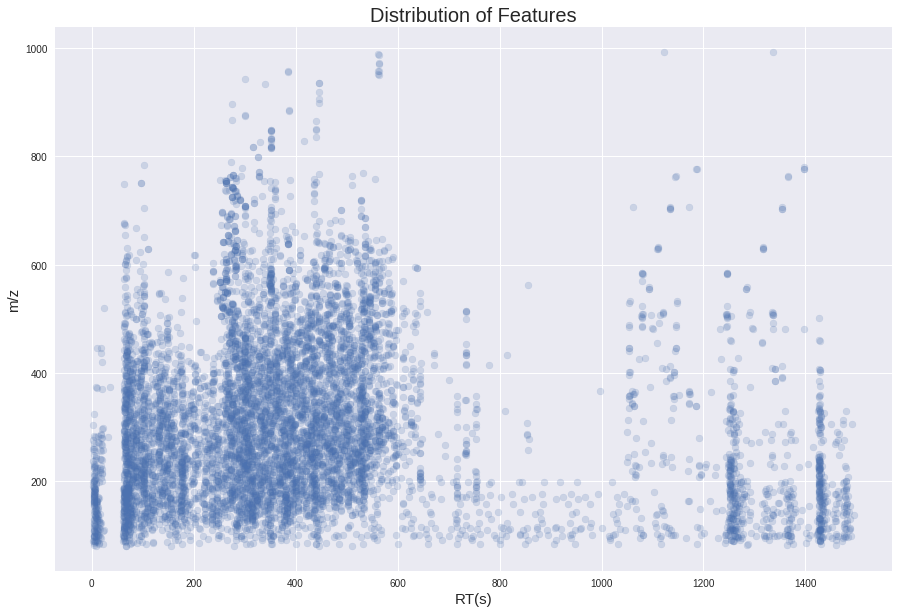

In [9]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
scatters = plt.scatter(fd['rt'], fd['mz'], alpha=.2)
ax = plt.gca()
ax.set_xlabel('RT(s)', fontsize=15)
ax.set_ylabel('m/z', fontsize=15)
ax.set_title('Distribution of Features', fontsize=20)
#plt.savefig('dist1.png')

In [10]:
scatters.get_facecolors()

array([[0.29803922, 0.44705882, 0.69019608, 0.2       ]])

# Filters

In [11]:
into.columns

Index(['F_index', 'Filter_01.mzXML', 'Filter_03.mzXML', 'Filter_05.mzXML',
       'Filter_075.mzXML', 'Filter_1.mzXML', 'Fiter_015.mzXML', 'QC_1_1.mzXML',
       'QC_1_2.mzXML', 'QC_1_3.mzXML', 'QC_2_1.mzXML', 'QC_2_2.mzXML',
       'QC_2_3.mzXML', 'QC_3_1.mzXML', 'QC_3_2.mzXML', 'QC_3_3.mzXML',
       'QC_4_1.mzXML', 'QC_4_2.mzXML', 'QC_4_3.mzXML', 'QC_5_1.mzXML',
       'QC_5_2.mzXML', 'QC_5_3.mzXML', 'Sample_1_1.mzXML', 'Sample_1_2.mzXML',
       'Sample_1_3.mzXML', 'Sample_2_1.mzXML', 'Sample_2_2.mzXML',
       'Sample_2_3.mzXML', 'Sample_3_1.mzXML', 'Sample_3_2.mzXML',
       'Sample_3_3.mzXML', 'Sample_4_1.mzXML', 'Sample_4_2.mzXML',
       'Sample_4_3.mzXML', 'Sample_5_1.mzXML', 'Sample_5_2.mzXML',
       'Sample_5_3.mzXML'],
      dtype='object')

In [12]:
filters = into.iloc[:, 0:7]
filters = filters.iloc[:,[0,1,6,2,3,4,5]]
filters = filters.rename({'Filter_01.mzXML':  '0.10',
                          'Fiter_015.mzXML': '0.15',
                          'Filter_03.mzXML':  '0.30', 
                          'Filter_05.mzXML':  '0.50', 
                          'Filter_075.mzXML': '0.75',
                          'Filter_1.mzXML':   '1.00'}, 
                          axis=1)
filters.head()

F_index          0.10          0.15          0.30          0.50  \
0        1  1.985377e+06  2.909245e+06  4.908377e+06  6.936050e+06   
1        2  2.299344e+07  3.184920e+07  5.211685e+07  7.504573e+07   
2        3  9.452991e+05  8.961250e+05  1.023743e+06  4.825853e+06   
3        4  8.826248e+05  1.841079e+06  5.140370e+06  9.308512e+06   
4        5  2.814078e+05  5.099740e+05  1.389269e+06  2.004741e+06   

           0.75          1.00  
0  8.752023e+06  1.064056e+07  
1  9.232607e+07  1.060672e+08  
2  1.365038e+06  7.261568e+05  
3  2.736374e+06  3.617496e+06  
4  2.873223e+06  3.163359e+06

In [13]:
def get_R2(x):
    y_i = np.array([0.1, 0.15, 0.3, 0.5, 0.75, 1])
    y_hat = x[1:] / x[-1]
    return r2_score(y_i, y_hat)

In [14]:
mp.cpu_count()

12

## Multiprocess apply

In [89]:
def deco(fun):
    def wrapper(*args, **kwargs):
        s = time.time()
        results = fun(*args, **kwargs)
        print(time.time()-s)
        return results
    return wrapper

def process(data, fun, axis):
    return data.apply(fun, axis)

def best_number_of_processes(data):
    import multiprocessing as mp
    
    CPUs = mp.cpu_count()
    rows = data.shape[0]
    if rows < 10:
        return 2
    elif rows < 100:
        return 4
    else:
        return CPUs
@deco
def multiprocessing_apply(data, fun, processes=None, axis=1):
    from multiprocessing import Pool
    from functools import partial
    
    if not processes:
        processes = best_number_of_processes(data)
        
    with Pool(processes=processes) as pool:
        if data.isnull().sum().sum():
            print("There are NA")
        
        data = np.array_split(data, processes)
        data = pool.map(partial(process, fun=fun, axis=axis), data)
        
        return pd.concat(data)

0.6536271572113037


Text(0.5, 0, '$R^2$')

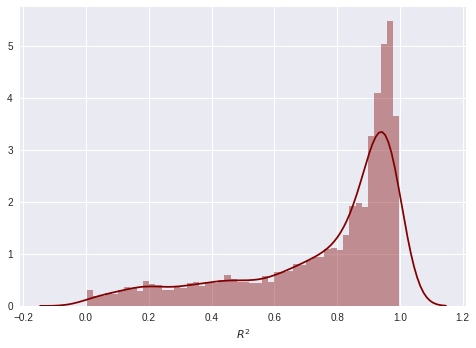

In [18]:
plt.style.use('seaborn')
r2 = multiprocessing_apply(filters.dropna(), get_R2)
sns.distplot(r2[r2>0], color='maroon', bins=50)
plt.xlabel('$R^2$')

In [19]:
test = filters.copy()

In [341]:
def subbin(nums):
    results = []
    N = len(nums)
    for i in range(2**N):
        pivot = bin(i)[2:][::-1]
        print(pivot)
        re = []
        for j in range(len(pivot)):
            if int(pivot[j]):
                re.append(nums[int(j)])
        results.append(re)
        
    return results

In [137]:
def subsets(nums):
    output = [[]]
    for i in range(len(nums)):
        for j in range(len(output)):
            output.append(output[j]+[nums[i]])
            
    return output

f = lambda x: len(x) >= 3

def get_R2_modify(x):
    if x.isnull().sum() > 3:
        return -1

    x = x.fillna(-1)[1:7]
    y_hat = x / x[-1]
    temp = y_hat
    y_hat = list(y_hat)
    
    y_i = [0.1, 0.15, 0.3, 0.5, 0.75, 1]
    pivot = 0
    for i in range(6):
        if x[i] == -1:
            y_hat.pop(i-pivot)
            y_i.pop(i-pivot)
            pivot += 1

    pivots = list(range(len(y_i)))
    subs = subsets(pivots)
    
    subs = list(filter(f, subs))
    y_i = np.array(y_i)
    y_hat = np.array(y_hat)

    d = {}
    for var, conc in zip(temp.values, temp.index):
        d[var] = conc  
    re = float('-inf')
    
    for sub in subs:
        p = r2_score(y_i[sub], y_hat[sub])
        if p > re:
            re = p
            indices = []
            for y in y_hat[sub]:
                indices.append(d[y])         
    return re, indices,        
    #return max(map(lambda index: r2_score(y_i[index], y_hat[index]), subs))

In [138]:
r2 = multiprocessing_apply(test, get_R2_modify)

There are NA
6.992000102996826


In [139]:
r2 = pd.DataFrame([r2.str[0], r2.str[1]]).T

In [140]:
r2[0] = r2[0].astype('float')

In [141]:
r2[r2[0] > .8][1].value_counts()

[0.10, 0.15, 1.00]    2084
[0.10, 0.75, 1.00]     685
[0.10, 0.30, 1.00]     386
[0.15, 0.30, 1.00]     361
[0.15, 0.75, 1.00]     348
[0.30, 0.75, 1.00]     272
[0.30, 0.50, 1.00]     259
[0.10, 0.50, 1.00]     243
[0.15, 0.50, 1.00]     233
[0.50, 0.75, 1.00]     190
Name: 1, dtype: int64

In [142]:
r2[r2[0] > .8].shape

(5061, 2)

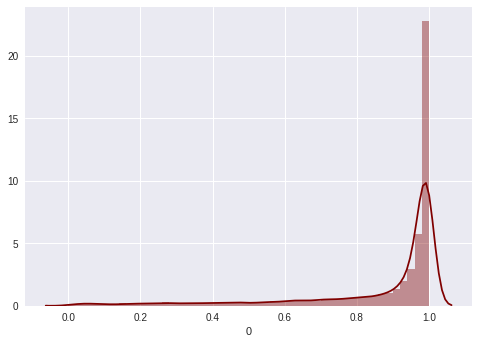

In [143]:
sns.distplot(r2[r2[0] > 0][0], color='maroon')

In [344]:
def subsets(nums):
    output = [[]]
    for i in range(len(nums)):
        for j in range(len(output)):
            output.append(output[j]+[nums[i]])
    return output

In [128]:
def first_drop(x):
    x = x.fillna(-1)
    x = x[1:7]
    pivot = True
    if x[3] == -1 or x[4] == -1 or x[5] == -1:
        return False
    for i in range(5,-1,-1):
        
        if pivot:
            if x[i] == -1:
                pivot = False
        else:
            if not x[i] == -1:
                return False
    
    return True

In [129]:
def get_R2_modify(x):
    x = x.fillna(-1)
    x = x[1:7]

    y_i = np.array([0.1, 0.15, 0.3, 0.5, 0.75, 1])
    
    y_hat = x / x[-1]
    
    pivot = 0
    for i in range(6):
        if not  x[i] == -1:
            pivot = i
            break
           
    y_i = y_i[pivot:]
    y_hat = y_hat[pivot:]
    return r2_score(y_i, y_hat)

In [132]:
test2 = filters.copy()
test2['normal'] = test2.apply(first_drop, axis=1)
print(test2.shape)
test2 = test2[test2['normal'] == True]
print(test2.shape)
test2['R2'] = test2.apply(get_R2_modify, axis=1)
test2[test2['R2'] > .8].shape

(8679, 8)
(8084, 8)


(2472, 9)

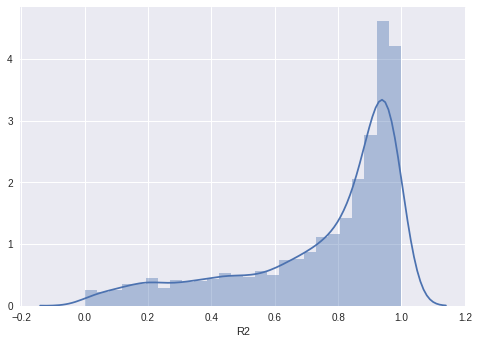

In [135]:
sns.distplot(test2[test2['R2']>0]['R2'])

In [145]:
index2 = test2[test2['R2'] > .8].index

In [144]:
index1 = r2[r2[0] > .8].index

In [149]:
index2.shape, index1.shape

((2472,), (5061,))

In [148]:
(index1 ^ index2).shape

(2589,)

In [153]:
(index1 | index2).shape

(5061,)

In [154]:
(index1 & index2).shape

(2472,)

In [150]:
2589+2472

5061

In [151]:
(index2 ^ index1).shape

(2589,)

In [158]:
fd['R2'] = r2[0]

In [160]:
fd['pass'] = fd['R2'] > .8

In [168]:
fd[~fd['pass']]['mz'].shape

(3618,)

In [283]:
r2[r2[0] > .8][1].value_counts()

[0.10, 0.15, 1.00]    2084
[0.10, 0.75, 1.00]     685
[0.10, 0.30, 1.00]     386
[0.15, 0.30, 1.00]     361
[0.15, 0.75, 1.00]     348
[0.30, 0.75, 1.00]     272
[0.30, 0.50, 1.00]     259
[0.10, 0.50, 1.00]     243
[0.15, 0.50, 1.00]     233
[0.50, 0.75, 1.00]     190
Name: 1, dtype: int64

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

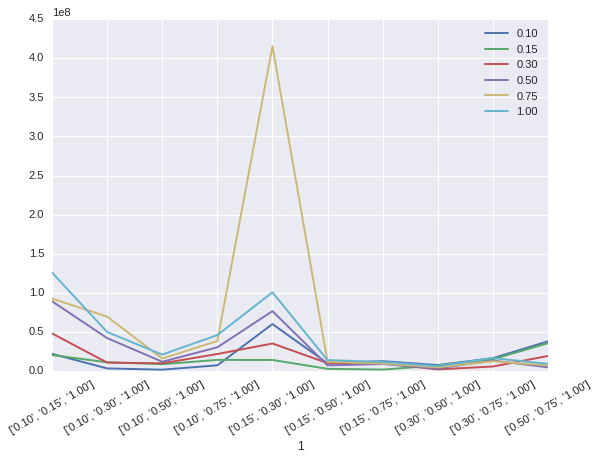

In [22]:
t = pd.concat([filters.iloc[:, 1:], r2], axis=1)
t[1] = t.apply(lambda x: str(x[1]), axis=1)
t[t[0]> .8].groupby(1).mean().iloc[:, :-1].plot()
plt.xticks(rotation=30)

In [56]:
t[t[0]>.8][1].value_counts()

['0.10', '0.15', '1.00']    2084
['0.10', '0.75', '1.00']     685
['0.10', '0.30', '1.00']     386
['0.15', '0.30', '1.00']     361
['0.15', '0.75', '1.00']     348
['0.30', '0.75', '1.00']     272
['0.30', '0.50', '1.00']     259
['0.10', '0.50', '1.00']     243
['0.15', '0.50', '1.00']     233
['0.50', '0.75', '1.00']     190
Name: 1, dtype: int64

In [67]:
t[t[0]> .8].groupby(1).mean().iloc[:, :-1].astype('int').reindex(t[t[0]>.8][1].value_counts().index).transform(lambda x: np.log(x))

0.10       0.15       0.30       0.50  \
['0.10', '0.15', '1.00']  16.908557  16.832907  17.688772  18.306716   
['0.10', '0.75', '1.00']  15.810175  16.475532  16.896591  17.229516   
['0.10', '0.30', '1.00']  15.035655  16.235500  16.196405  17.557306   
['0.15', '0.30', '1.00']  17.911581  16.468822  17.378398  18.154166   
['0.15', '0.75', '1.00']  16.355019  14.452920  16.096341  16.013757   
['0.30', '0.75', '1.00']  16.616545  16.538407  15.580601  16.415802   
['0.30', '0.50', '1.00']  15.855855  15.778061  14.567756  15.014551   
['0.10', '0.50', '1.00']  14.395589  15.993556  16.111408  16.292813   
['0.15', '0.50', '1.00']  16.103591  14.867127  16.132722  15.799306   
['0.50', '0.75', '1.00']  17.455583  17.388233  16.776459  15.387226   

                               0.75       1.00  
['0.10', '0.15', '1.00']  18.344667  18.651755  
['0.10', '0.75', '1.00']  17.464994  17.644109  
['0.10', '0.30', '1.00']  18.058382  17.725758  
['0.15', '0.30', '1.00']  19.844275  18.427317  
['0.15', '0.75', '1.00']  16.075901  16.275193  
['0.30', '0.75', '1.00']  16.341372  16.621905  
['0.30', '0.50', '1.00']  15.395922  15.671098  
['0.10', '0.50', '1.00']  16.592896  16.864093  
['0.15', '0.50', '1.00']  16.284312  16.456603  
['0.50', '0.75', '1.00']  15.789001  16.047694

In [61]:
t[t[0]> .8].groupby(1).mean().iloc[:, :-1].astype('int').reindex(t[t[0]>.8][1].value_counts().index)

0.10      0.15      0.30      0.50       0.75  \
['0.10', '0.15', '1.00']  22044132  20438003  48099022  89228977   92680303   
['0.10', '0.75', '1.00']   7349733  14296598  21781932  30386698   38454815   
['0.10', '0.30', '1.00']   3387676  11245744  10814573  42173625   69607444   
['0.15', '0.30', '1.00']  60103628  14200991  35264867  76604486  415201575   
['0.15', '0.75', '1.00']  12673446   1891574   9784805   9009199    9586827   
['0.30', '0.75', '1.00']  16461667  15224351   5842098  13467663   12501660   
['0.30', '0.50', '1.00']   7693261   7117458   2121758   3316931    4856954   
['0.10', '0.50', '1.00']   1786178   8829034   9933350  11909101   16076930   
['0.15', '0.50', '1.00']   9855996   2862273  10147338   7270285   11808286   
['0.50', '0.75', '1.00']  38094615  35613418  19316286   4814903    7195749   

                               1.00  
['0.10', '0.15', '1.00']  125995287  
['0.10', '0.75', '1.00']   45998024  
['0.10', '0.30', '1.00']   49911303  
['0.15', '0.30', '1.00']  100665861  
['0.15', '0.75', '1.00']   11701095  
['0.30', '0.75', '1.00']   16550140  
['0.30', '0.50', '1.00']    6395456  
['0.10', '0.50', '1.00']   21085439  
['0.15', '0.50', '1.00']   14028522  
['0.50', '0.75', '1.00']    9320195

In [98]:
sum_t = t[t[0]>.1].iloc[:, :6].sum()
print(sum_t)
sum_t = sum_t / sum_t[-1]
r2_score([.1, .15, .3, .5, .75, 1.], sum_t)

0.10    1.045316e+11
0.15    1.155249e+11
0.30    1.858286e+11
0.50    2.995852e+11
0.75    4.454426e+11
1.00    4.080137e+11
dtype: float64


0.6213093873693278

In [76]:
t.shape

(8679, 8)

[]

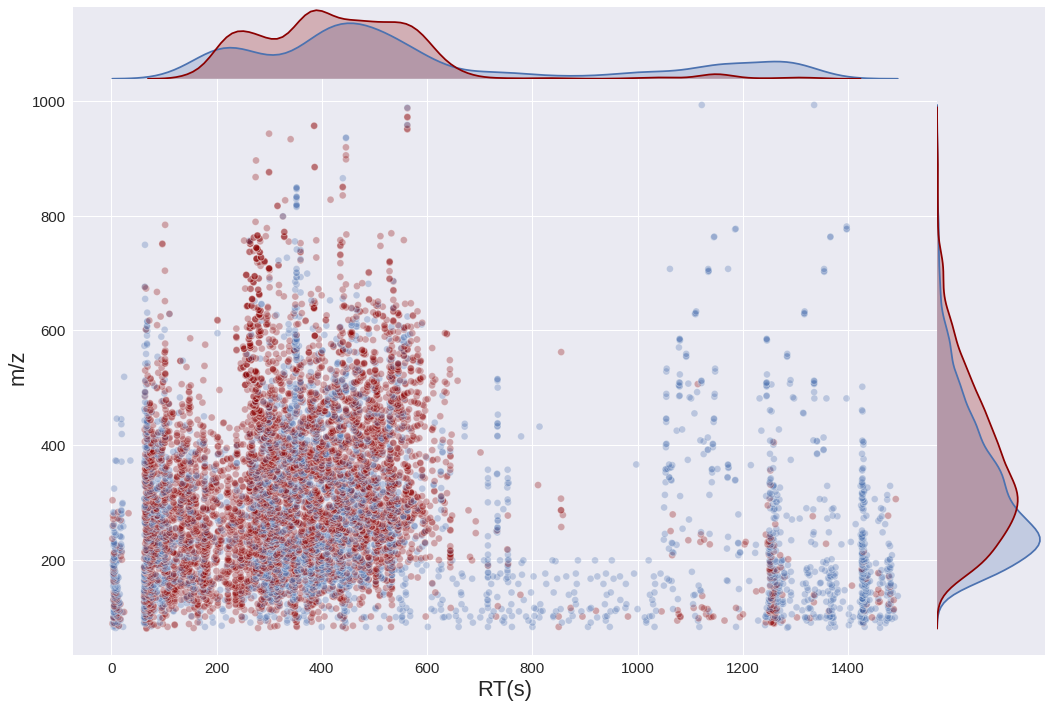

In [226]:
plt.figure(figsize=(15,10))
ax1 = plt.axes([0.9, 0.1, 0.1, .8])
sns.kdeplot(fd[~fd['pass']]['mz'], shade=True, color=[0.29803922, 0.44705882, 0.69019608], vertical=True, ax=ax1)
sns.kdeplot(fd[fd['pass']]['mz'], shade=True, color='darkred', vertical=True, ax=ax1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.legend('')

ax2 = plt.axes([0.1, 0.1, 0.8, 0.8])
sns.scatterplot('rt', 'mz', hue='pass', data=fd, alpha=.3, 
                palette=[[0.29803922, 0.44705882, 0.69019608],'darkred'], 
                edgecolor='w', ax=ax2,
                legend=False)
ax2.set_xlabel('RT(s)', fontsize=22)
ax2.set_ylabel('m/z', fontsize=22)
ax2.tick_params(labelsize=15)

'''top = 900
left = 920
ax2.text(left+40, top, 'Not passed', fontsize=25)
ax2.text(left+40, top-60, 'Passed', fontsize=25)
ax2.scatter(left, top+15, c=[[0.29803922, 0.44705882, 0.69019608]], s=300)
ax2.scatter(left, top-45, c='darkred', s=300)'''

ax3 = plt.axes([0.1, 0.9, 0.8, 0.1])
sns.kdeplot(fd[~fd['pass']]['rt'], shade=True, color=[0.29803922, 0.44705882, 0.69019608], ax=ax3)
sns.kdeplot(fd[fd['pass']]['rt'], shade=True, color='darkred', ax=ax3)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlabel('')
ax3.legend('')

ax4 = plt.axes([0.9, 0.9, 0.1, 0.1])
ax4.set_xticks([])
ax4.set_yticks([]) 

#plt.savefig('distribution.png')

# Order of Sample Sequence

In [99]:
snames = ['QC 2-3', 'QC 1-1', 'QC 2-2', 'QC 4-2', 'QC 1-3', 'QC 5-2', 'QC 5-1', 'QC 2-1', 
         'Sample 4-2', 'Filter 0.3', 'Sample 1-2', 'QC 3-1',
         'Sample 5-2', 'Sample 3-2', 'Sample 1-3', 'QC 1-2',
         'Sample 5-1', 'Sample 2-2', 'Sample 5-3', 'QC 5-3',
         'Filter 0.75', 'Sample 3-3', 'Sample 4-1', 'QC 3-3',
         'Filter 1.0', 'Sample 2-3', 'Sample 4-3', 'QC 3-2', 
         'Filter 0.1', 'Filter 0.5', 'Sample 1-1', 'QC 4-3', 
         'Sample 2-1', 'Filter 0.15', 'Sample 3-1', 'QC 4-1']

In [100]:
snames_df = pd.DataFrame(snames, columns=['Sname'])

In [101]:
def classify(x):
    return x[0][:2]

In [102]:
snames_df['Class'] = snames_df.apply(classify, axis=1)
snames_df.head()

Sname Class
0  QC 2-3    QC
1  QC 1-1    QC
2  QC 2-2    QC
3  QC 4-2    QC
4  QC 1-3    QC

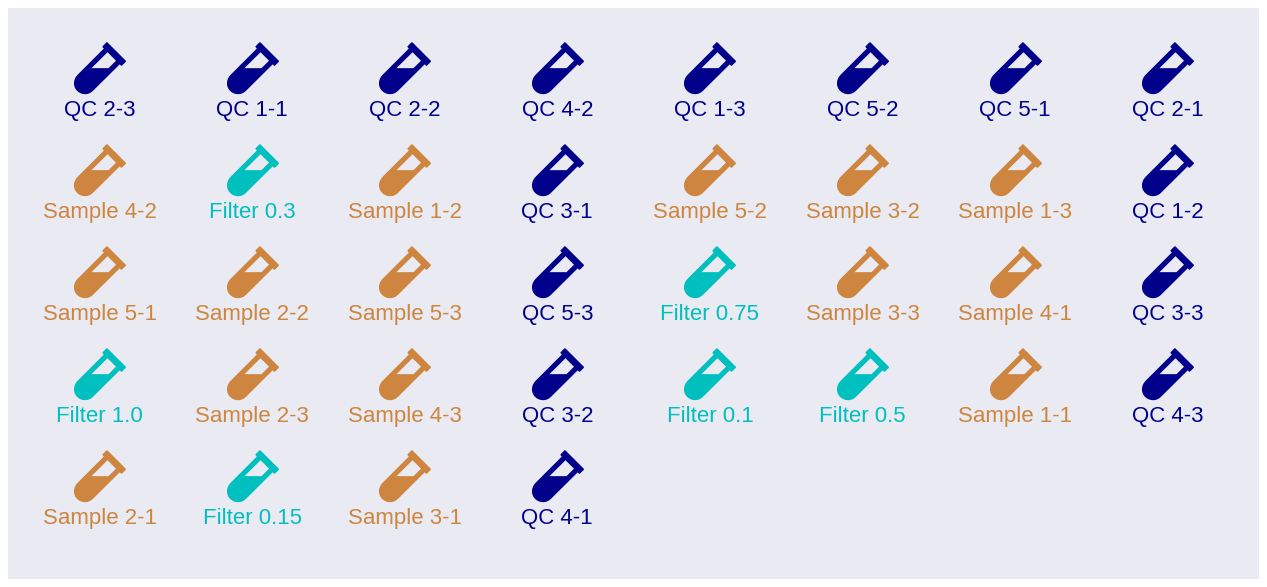

In [103]:
fp1 = FontProperties(fname="../movingdisk/GitHub/python_study/fontawesome-free-5.7.2-desktop/otfs/Font Awesome 5 Free-Solid-900.otf")

cmap = dict(QC='darkblue', Sa='peru', Fi='c')

plt.style.use(plt.style.available[6])

plt.figure(figsize=(16,7.5))

ax=plt.gca()

for i in range(snames_df.shape[0]):
    x = (i % 8)*2.5 + 1.5
    y = -(i // 8)
    cls = snames_df.iloc[i,1]
    sname = snames_df.iloc[i,0]
    ax.text(x, y, '\uf492', fontproperties=fp1, size=50, color=cmap[cls],
           ha='center', va='center')
    ax.text(x, y-0.4, sname, size=20, color=cmap[cls],
           ha='center', va='center')
ax.set_xlim(0,20.5)
ax.set_ylim(-5,0.6)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
#plt.savefig('Injection sequence.png')

In [104]:
QCs_eq = into.iloc[:, [12, 7, 11, 17, 9, 20, 19, 10]]
QCs_nor = into.iloc[:, [13, 8, 21, 15, 14, 18, 16]]

In [105]:
Samples = into.iloc[:, 22:]
Samples_ordered = Samples.iloc[:, [10, 1, 13, 7, 2, 12, 4, 14, 8, 9, 5, 11, 0, 3, 6]]

In [184]:
def RSD(x):
    return int(np.log10(np.mean(x))), np.std(x, ddof=1) / np.mean(x)

In [185]:
QCs_nor.dropna(how='all').shape

(8654, 7)

In [186]:
rsd = QCs_nor.dropna(how='all').fillna(1).apply(RSD, axis=1).str[1]

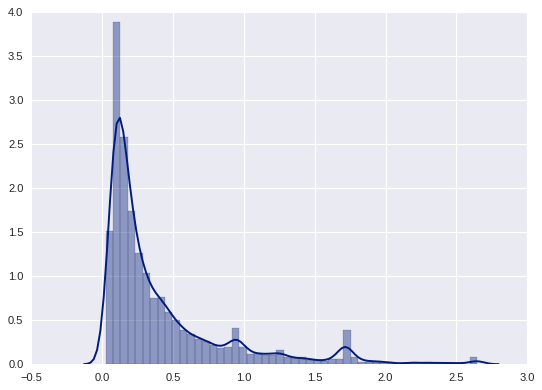

In [187]:
sns.distplot(rsd)

In [188]:
rsd[rsd<.2].shape

(3944,)

In [189]:
from matplotlib_venn import venn2

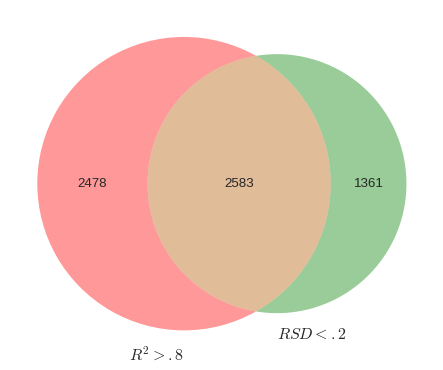

In [190]:
A = set(t[t[0] > .8].index)
B = set(rsd[rsd<.2].index)
venn2([A, B], set_labels=('$R^2>.8$', '$RSD<.2$'))
ax = plt.gca()

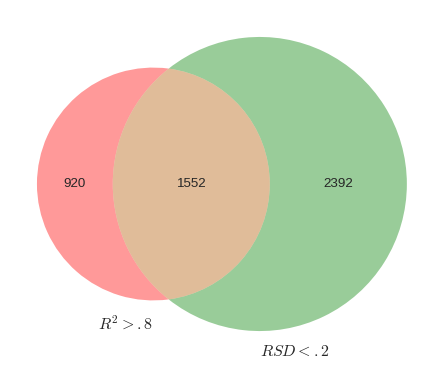

In [191]:
C = set(test2[test2['R2'] > .8].index)
B = set(rsd[rsd<.2].index)
venn2([C, B], set_labels=('$R^2>.8$', '$RSD<.2$'))
ax = plt.gca()

In [192]:
(test2[test2['R2'] > .8].index & rsd[rsd<.2].index).shape

(1552,)

In [193]:
(t[t[0] > .8].index & rsd[rsd<.2].index).shape

(2583,)

In [47]:
((test2[test2['R2'] > .8].index & rsd[rsd<.2].index) | (t[t[0] > .8].index & rsd[rsd<.2].index)).shape

(2583,)

In [55]:
newindex = test2[test2['R2'] > .8].index
newindex.shape

(2472,)

In [6]:
test2[test2['R2'] > .8].index.shape

(2472,)

In [8]:
t[t[0] > .8].index.shape

(5061,)

# Peak Figure 3D

In [3]:
conc = '1.00'

In [26]:
threeD = pd.merge(fd, filters, on='F_index').loc[:,['mz', 'rt', conc]].dropna()

mzmin, mzmax = threeD['mz'].min(), threeD['mz'].max()

mzmin = round(mzmin)
mzmax = round(mzmax)

rt_range = np.arange(1, 1501, 1500/500)
mz_range = np.arange(mzmin, mzmax, (mzmax-mzmin)/500)

threeD['RT'] = pd.cut(threeD['rt'], bins=500, labels=rt_range)
threeD['mz'] = pd.cut(threeD['mz'], bins=500, labels=mz_range)

threeD = threeD[[conc, 'RT', 'mz']]

x = rt_range
y = mz_range
x, y = np.meshgrid(x, y)

mat = threeD.groupby(['RT', 'mz']).mean()

mat = mat.unstack().fillna(1).T

z = mat.values.ravel().reshape(500,500)

#z = np.log(z)

In [27]:
z.shape

(500, 500)

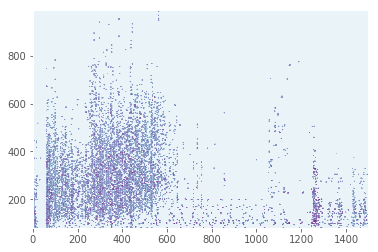

In [32]:
plt.contourf(x, y, z, cmap=plt.cm.BuPu)

In [161]:
z.min()

0.0

(array([2.300e+01, 5.900e+01, 1.560e+02, 6.610e+02, 1.291e+03, 1.461e+03,
        1.226e+03, 8.850e+02, 6.090e+02, 3.610e+02, 2.340e+02, 1.670e+02,
        9.400e+01, 4.900e+01, 1.500e+01, 7.000e+00, 7.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00]),
 array([10.90494238, 11.61179966, 12.31865693, 13.02551421, 13.73237149,
        14.43922877, 15.14608604, 15.85294332, 16.5598006 , 17.26665788,
        17.97351515, 18.68037243, 19.38722971, 20.09408699, 20.80094426,
        21.50780154, 22.21465882, 22.9215161 , 23.62837337, 24.33523065,
        25.04208793]),
 <a list of 20 Patch objects>)

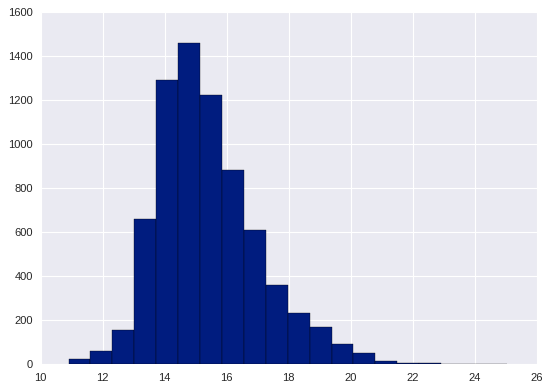

In [171]:
plt.hist(z[z!=0], bins=20)

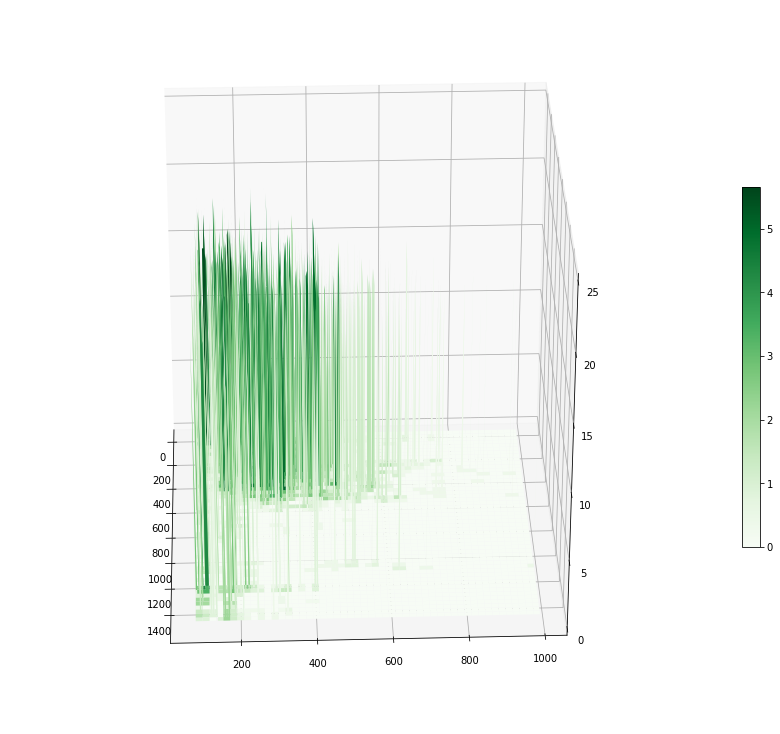

In [45]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure(figsize=(12,10))

ax = Axes3D(fig)

surf = ax.plot_surface(x, y, z, cmap=plt.cm.Greens, 
                       rstride=10, cstride=10, 
                      edgecolor=None, linewidth=0)

fig.colorbar(surf, shrink=.5)

os.system('mkdir peak3D')
for angle in range(0, 360, 2):
    ax.view_init(30, angle)
    plt.savefig('peak3D/peak_%.3d.png' % angle)
os.system('magick -delay 10 -loop 0 peak3D//peak_*.png peak3D.gif')

0

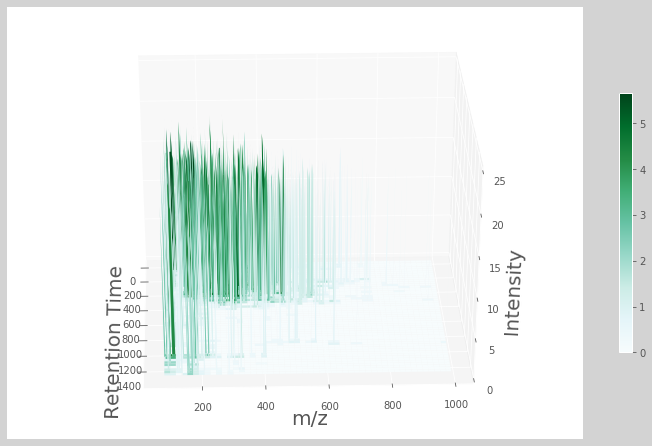

In [4]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

ax = Axes3D(fig)

surf = ax.plot_surface(x, y, z, 
                       cmap=plt.cm.BuGn, 
                       rstride=10, cstride=10,
                      edgecolor=None, linewidth=0)
fig.set_facecolor('lightgrey')
fig.colorbar(surf, shrink=.6)
ax.set_facecolor('w')

os.system('mkdir peak3D_v1.1')
for angle in range(0, 360, 2):
    ax.view_init(30, angle)
    ax.set_xlabel('Retention Time', fontsize=20)
    ax.set_ylabel('m/z', fontsize=20)
    ax.set_zlabel('Intensity', fontsize=20)
    
    fig.savefig('peak3D_v1.1/peak_%.3d.png' % angle)

os.system('magick -delay 10 -loop 0 peak3D_v1.1//peak_*.png peak3D_v1.1.gif')

In [21]:
dill.dump_session('2_17.pyData')

In [159]:
peaktable = pd.read_csv('cp_centroid.csv').rename({'Unnamed: 0':'Peak_index'}, axis=1)

peaktable = peaktable[peaktable['sample'] == 5]

peaktable = peaktable[['mz', 'rt', 'into']]

peaktable.isnull().sum()

mz      0
rt      0
into    0
dtype: int64

In [155]:
bins_rt = 1000
bins_mz = 500

rts = np.arange(peaktable['rt'].min(), peaktable['rt'].max(), (peaktable['rt'].max()-peaktable['rt'].min())/bins_rt)
mzs = np.arange(peaktable['mz'].min(), peaktable['mz'].max(), (peaktable['mz'].max()-peaktable['mz'].min())/bins_mz)

peaktable['rt'] = pd.cut(peaktable['rt'], bins_rt)
peaktable['mz'] = pd.cut(peaktable['mz'], bins_mz)

In [156]:
def get_med(x):
    return x[0].right, x[1].right

In [157]:
peaktable['mz'], peaktable['rt'] = peaktable.apply(get_med, axis=1).str

In [158]:
raw_mat = peaktable.groupby(['rt','mz']).mean()
raw_mat = raw_mat.unstack()
raw_mat = raw_mat.fillna(1)

In [150]:
raw_mat.shape

(844, 452)

In [151]:
rt0 = peaktable['rt'].sort_values().unique()
mz0 = peaktable['mz'].sort_values().unique()
rt0, mz0 = np.meshgrid(rt0, mz0)
z0 = raw_mat.values.ravel().reshape(844,452).T
z0 = np.log(z0)

In [152]:
rt0.shape, mz0.shape, z0.shape

((452, 844), (452, 844), (452, 844))

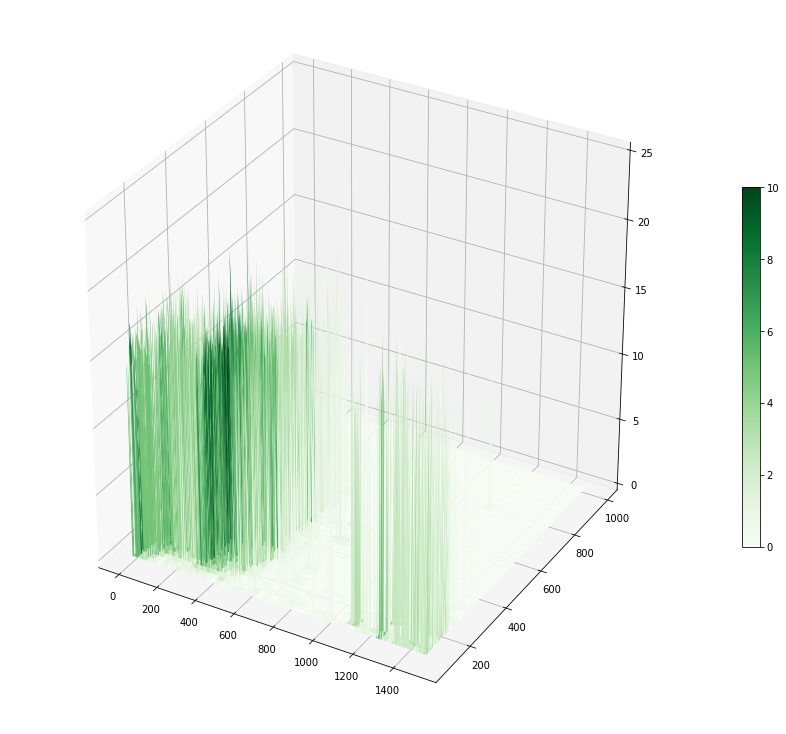

In [153]:
fig = plt.figure(figsize=(12,10))

ax = Axes3D(fig)

surf = ax.plot_surface(rt0, mz0, z0, cmap=plt.cm.Greens, 
                       #rstride=1, cstride=1, 
                      #edgecolor=None, linewidth=0
                      )

fig.colorbar(surf, shrink=.5)

# QC

* **DataSets:** QCs_eq, QCs_nor, Samples, Samples_ordered
* **Indexes:**noise_index, pass_index, pass_modified_index
* **Fun:** RSD( return 'mag' and 'RSD')

In [320]:
QCs_nor.columns

Index(['QC_3_1.mzXML', 'QC_1_2.mzXML', 'QC_5_3.mzXML', 'QC_3_3.mzXML',
       'QC_3_2.mzXML', 'QC_4_3.mzXML', 'QC_4_1.mzXML'],
      dtype='object')

In [9]:
def RSD_modified(x):
    return int(np.log10(np.mean(x))), np.mean(x), np.std(x, ddof=1) / np.mean(x)   

In [10]:
plt.style.use('seaborn')

In [13]:
pass_index = test2[test2['R2'] > .8].index

In [29]:
QCs_total = QCs_nor.dropna().copy()

In [30]:
QCs_pass = QCs_nor.copy().loc[pass_index].dropna()

In [31]:
QCs_noise = QCs_nor.copy().loc[QCs_nor.index ^ pass_index].dropna()

In [21]:
QCs_noise.shape

(6207, 7)

In [22]:
QCs_pass.shape

(2472, 7)

QCs_total = QCs_nor.dropna()
QCs_pass = QCs_nor.loc[pass_index | pass_modified_index].dropna()
QCs_noise = QCs_nor.loc[noise_index].dropna()

In [32]:
QCs_total['mag'], QCs_total['mean'], QCs_total['RSD'] = QCs_total.apply(RSD_modified, axis=1).str
QCs_pass['mag'], QCs_pass['mean'], QCs_pass['RSD'] = QCs_pass.apply(RSD_modified, axis=1).str
QCs_noise['mag'], QCs_noise['mean'], QCs_noise['RSD'] = QCs_noise.apply(RSD_modified, axis=1).str

QCs_total.shape, QCs_pass.shape, QCs_noise.shape

((7655, 10), (2353, 10), (5302, 10))

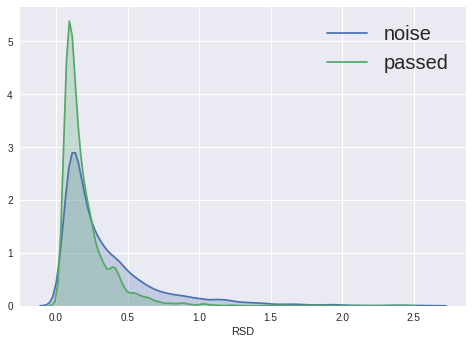

In [33]:
sns.distplot(QCs_noise['RSD'], label='noise', hist=False, kde_kws={'shade':'True'})
sns.distplot(QCs_pass['RSD'], label='passed', hist=False, kde_kws={'shade':'True'})
plt.legend(fontsize=20)
ax= plt.gca()
#ax.set_xlim(-.2,1)

In [34]:
QCs_noise[QCs_noise['RSD'] < .2].shape[0]

2392

In [35]:
QCs_pass[QCs_pass['RSD'] < .2].shape[0]

1552

/home/prz/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1233: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/home/prz/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1234: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


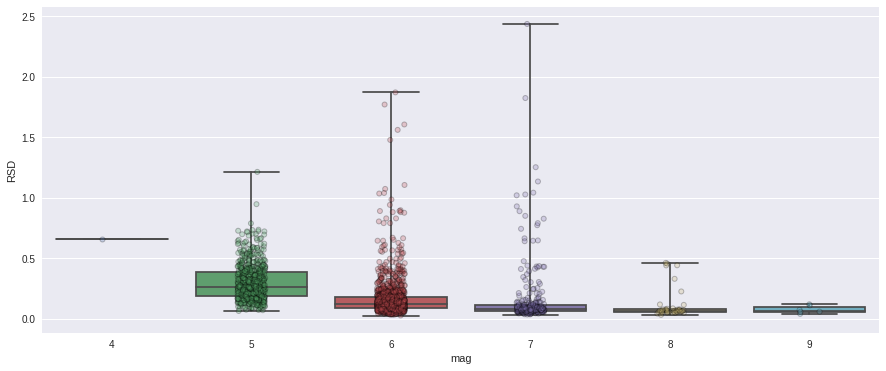

In [36]:
plt.figure(figsize=(15,6))
sns.boxplot('mag', 'RSD', data=QCs_pass, whis=np.inf)
sns.stripplot('mag', 'RSD', data=QCs_pass, jitter=True, edgecolor='k', linewidth=1, alpha=.25, dodge=True)
#plt.savefig('box_strip.png')

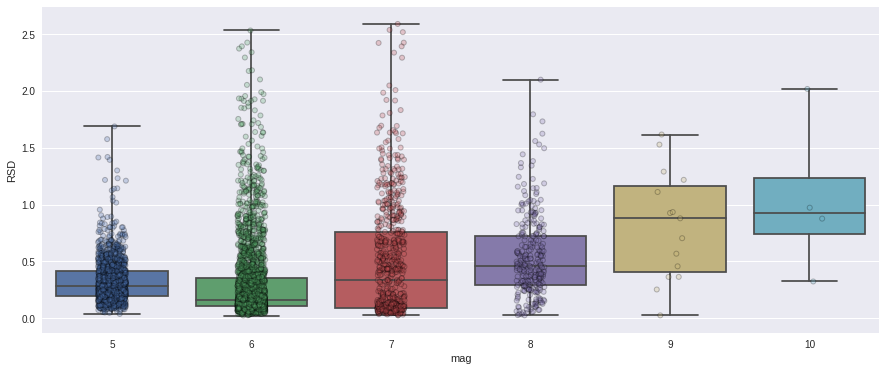

In [37]:
plt.figure(figsize=(15,6))
sns.boxplot('mag', 'RSD', data=QCs_noise, whis=np.inf)
sns.stripplot('mag', 'RSD', data=QCs_noise, jitter=True, edgecolor='k', linewidth=1, alpha=.25, dodge=True)
#plt.savefig('box_strip_noise.png')

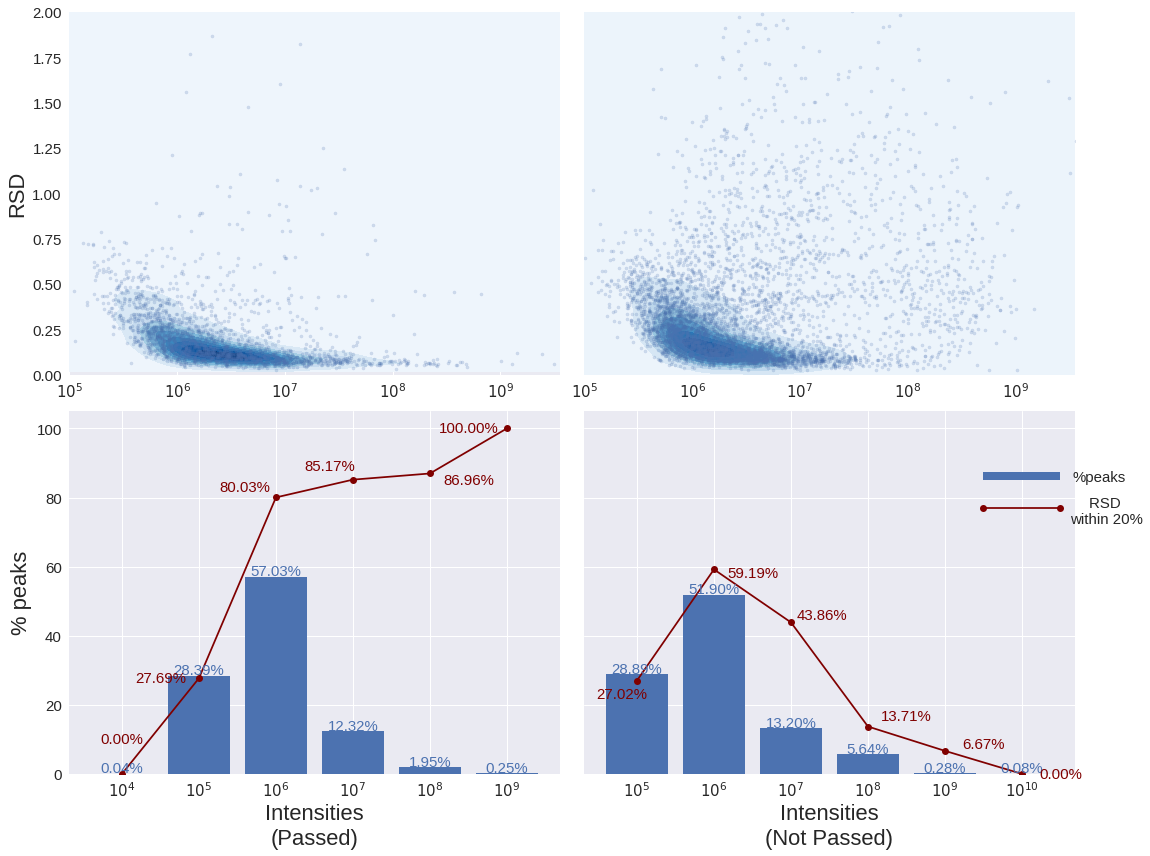

In [52]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.kdeplot(np.log(QCs_pass['mean']), QCs_pass['RSD'], shade=True, cmap=plt.cm.Blues, cut=.5, ax=ax1)
ax1.scatter(np.log(QCs_pass['mean']), QCs_pass['RSD'], alpha=.2, s=10)

sns.kdeplot(np.log(QCs_noise['mean']), QCs_noise['RSD'], shade=True, cmap=plt.cm.Blues, cut=.5, ax=ax2)
ax2.scatter(np.log(QCs_noise['mean']), QCs_noise['RSD'], alpha=.2, s=10)

for i, ax in enumerate([ax1, ax2]):
    ax.set_xticks(np.log([1e5, 1e6, 1e7, 1e8, 1e9]))
    ax.set_xticklabels(['$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$'], fontsize=15)
    ax.set_xlim(11.5, 22)
    ax.set_ylim(0,2)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.set_ylabel('RSD', fontsize=22)
    ax.set_xlabel('')
ax2.set_ylabel('')
ax2.set_yticklabels([])

# ax3
n_peaks_pass = QCs_pass.groupby('mag').aggregate('count').values.T[0] / QCs_pass.shape[0] *100
n_peaks_pass = np.round(n_peaks_pass, 2)
percent_pass = []
for n in n_peaks_pass:
    percent_pass.append('%.2f%%' % n)
bars = ax3.bar(np.arange(6), n_peaks_pass, alpha=1)
c = bars[0].get_facecolor()
for i in range(6):
    ax3.text(i, n_peaks_pass[i]+1.5, percent_pass[i], color=c[:3], ha='center', va='center', fontsize=15)
    
pass_02 = []
for i in range(6):
    per = QCs_pass[(QCs_pass['RSD'] <.2) & (QCs_pass['mag'] == i+4)].shape[0]
    per = per / QCs_pass.groupby('mag').aggregate('count').values.T[0][i] * 100
    pass_02.append(per)
    
ax3.plot(np.arange(6), pass_02, c='maroon', marker='o')

pass_02_str = []
for per in pass_02:
    pass_02_str.append('%.2f%%' % per)

loc_off = [[0,10], [-.5,0], [-.4,3], [-.3,4], [.5,-2], [-.5,0]]
for i in range(6):
    ax3.text(i+loc_off[i][0], pass_02[i]+loc_off[i][1], pass_02_str[i],
            va='center', ha='center',
            fontsize=15, color='maroon')
ax3.set_xticks(np.arange(6))
ax3.set_xticklabels(['$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$'], fontsize=15)
ax3.set_ylim(0, 105)

# ax4
n_peaks_noise = QCs_noise.groupby('mag').aggregate('count').values.T[0] / QCs_noise.shape[0] *100
n_peaks_noise = np.round(n_peaks_noise, 2)
percent_noise = []
length = len(n_peaks_noise)

for n in n_peaks_noise:
    percent_noise.append('%.2f%%' % n)
    
bars = plt.bar(np.arange(length), n_peaks_noise, alpha=1)
c = bars[0].get_facecolor()
for i in range(length):
    plt.text(i, n_peaks_noise[i]+1.5, percent_noise[i], color=c[:3], ha='center', va='center', fontsize=15)
    
noise_02 = []
for i in range(length):
    per = QCs_noise[(QCs_noise['RSD'] <.2) & (QCs_noise['mag'] == i+5)].shape[0]
    per = per / QCs_noise.groupby('mag').aggregate('count').values.T[0][i] * 100
    noise_02.append(per)
    
plt.plot(np.arange(length), noise_02, c='maroon', marker='o')

noise_02_str = []
for per in noise_02:
    noise_02_str.append('%.2f%%' % per)

loc_off = [[-.2,-4], [.5,-1], [.4,2], [.5,3], [.5,2], [.5,0], [0.5,4]]
for i in range(length):
    plt.text(i+loc_off[i][0], noise_02[i]+loc_off[i][1], noise_02_str[i],
            va='center', ha='center',
            fontsize=15, color='maroon')

ax4.set_xticks(np.arange(length))
ax4.set_xticklabels(['$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$','$10^{10}$'], fontsize=15)

for i, ax in enumerate([ax3, ax4]):
    ax.set_ylabel('% peaks', fontsize=22)
    ax.yaxis.set_tick_params(labelsize=15)
    labels = ['(Passed)', '(Not Passed)']
    ax.set_xlabel('Intensities\n%s' % labels[i], fontsize=22)
    

rect = Rectangle((4.5, 85), 1, 2.5)
ax4.add_patch(rect)
ax4.text(6, 86, '%peaks', ha='center', va='center', fontsize=15)
line = Line2D([4.5, 5.5], [77, 77], color='maroon', marker='o')
ax4.text(6.1, 76, 'RSD \nwithin 20%', ha='center', va='center', fontsize=15)
ax4.add_line(line)
ax4.set_ylabel('')
ax4.set_yticklabels([])
ax4.set_ylim(0,105)

plt.tight_layout()
#plt.savefig('compare.png')

In [169]:
QCs_pass[QCs_pass['RSD'] >.2].shape

(875, 10)

In [57]:
QCs_final = QCs_pass[QCs_pass['RSD'] <.2]
QCs_final = QCs_eq.loc[QCs_final.index].join(QCs_final).dropna().iloc[:, :15]

In [58]:
QCs_final.shape

(1528, 15)

In [60]:
QCs_final.columns

Index(['QC_2_3.mzXML', 'QC_1_1.mzXML', 'QC_2_2.mzXML', 'QC_4_2.mzXML',
       'QC_1_3.mzXML', 'QC_5_2.mzXML', 'QC_5_1.mzXML', 'QC_2_1.mzXML',
       'QC_3_1.mzXML', 'QC_1_2.mzXML', 'QC_5_3.mzXML', 'QC_3_3.mzXML',
       'QC_3_2.mzXML', 'QC_4_3.mzXML', 'QC_4_1.mzXML'],
      dtype='object')

In [65]:
from sklearn.decomposition import PCA

In [49]:
QCs_PCA = PCA(n_components=8).fit_transform(np.log(QCs_final.T))

In [50]:
QCs_PCA.shape

(15, 8)

In [61]:
Samples_final = Samples.iloc[QCs_final.index]

In [62]:
allsamples = QCs_final.join(Samples_final).dropna()

seq = [0, 1, 2, 3, 4, 5, 6, 7, 
      25, 16, 8, 
      28, 22, 17, 9,
      27, 19, 29, 10, 
      23, 24, 11, 
      20, 26, 12, 
      15, 13, 
      18, 21, 14]

allsamples = allsamples.iloc[:,seq]

In [63]:
allsamples.columns

Index(['QC_2_3.mzXML', 'QC_1_1.mzXML', 'QC_2_2.mzXML', 'QC_4_2.mzXML',
       'QC_1_3.mzXML', 'QC_5_2.mzXML', 'QC_5_1.mzXML', 'QC_2_1.mzXML',
       'Sample_4_2.mzXML', 'Sample_1_2.mzXML', 'QC_3_1.mzXML',
       'Sample_5_2.mzXML', 'Sample_3_2.mzXML', 'Sample_1_3.mzXML',
       'QC_1_2.mzXML', 'Sample_5_1.mzXML', 'Sample_2_2.mzXML',
       'Sample_5_3.mzXML', 'QC_5_3.mzXML', 'Sample_3_3.mzXML',
       'Sample_4_1.mzXML', 'QC_3_3.mzXML', 'Sample_2_3.mzXML',
       'Sample_4_3.mzXML', 'QC_3_2.mzXML', 'Sample_1_1.mzXML', 'QC_4_3.mzXML',
       'Sample_2_1.mzXML', 'Sample_3_1.mzXML', 'QC_4_1.mzXML'],
      dtype='object')

In [66]:
PCA_allsamples = PCA(n_components=8).fit_transform(np.log(allsamples.T))

In [67]:
def deal_names(cols):
    re = []
    for i, name in enumerate(cols):
        if i in [0, 1, 2]:
            re.append('QC-eq-%s' % str(i+1))
        elif i in [3, 4, 5, 6, 7]:
            re.append('QC-eq')
        elif name.startswith('Sa'):
            name = name[:10]
            re.append('Sa-%s' % name[-3])
        else:
            re.append('QC-nor')
    
    return re

In [68]:
names = deal_names(allsamples.columns)

In [69]:
colormap = {'QC-eq-1': ['darkred',True], 'QC-eq-2':['red', True], 'QC-eq-3':['lightcoral', True], 
            'QC-eq': ['gold', True], 'QC-nor': ['olive', True], 
           'Sa-1': ['plum', True], 'Sa-2': ['skyblue', True], 'Sa-3': ['teal', True], 'Sa-4': ['forestgreen', True], 'Sa-5': ['peru', True]}
colormap

{'QC-eq-1': ['darkred', True],
 'QC-eq-2': ['red', True],
 'QC-eq-3': ['lightcoral', True],
 'QC-eq': ['gold', True],
 'QC-nor': ['olive', True],
 'Sa-1': ['plum', True],
 'Sa-2': ['skyblue', True],
 'Sa-3': ['teal', True],
 'Sa-4': ['forestgreen', True],
 'Sa-5': ['peru', True]}

In [70]:
pca_mat = pd.DataFrame(PCA_allsamples)

pca_mat['class'] = names
pca_mat['cate'] = pca_mat['class'].str[:2]
pca_mat.head()

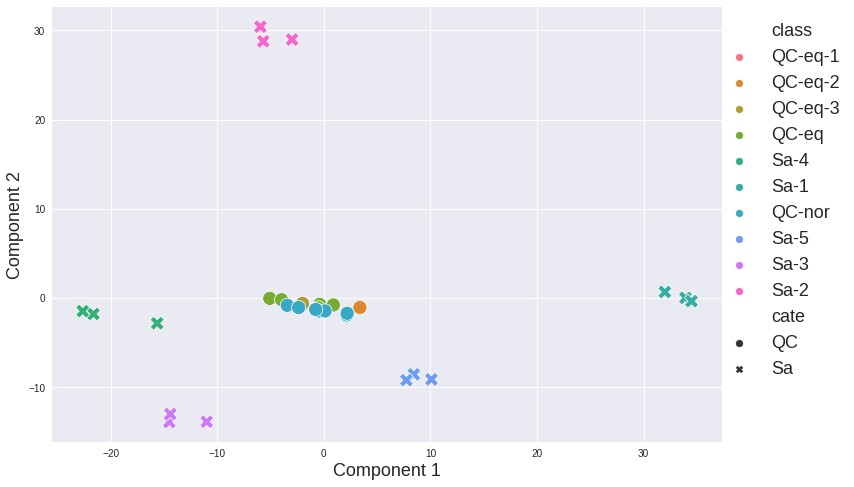

In [72]:
plt.figure(figsize=(12,8))
scatters = sns.scatterplot(0, 1, hue='class', style='cate', data=pca_mat, s=200)
plt.legend(fontsize=18, bbox_to_anchor=[1,1, .2, 0])
plt.xlabel('Component 1', fontsize=18)
plt.ylabel('Component 2', fontsize=18)

#plt.savefig('pca_all.png')

In [78]:
def deal_names(cols):
    re = []
    for i, name in enumerate(cols):
        if i in [0, 1, 2]:
            re.append('QC-eq-%s' % str(i+1))
        elif i in [3, 4, 5, 6, 7]:
            re.append('QC-eq')
        elif name.startswith('Sa'):
            name = name[:10]
            re.append('Sa-%s' % name[-3])
        else:
            re.append('QC-nor')
    
    return re

def draw_pca(PCA_allsamples):
    names = deal_names(allsamples.columns)
    colormap = {'QC-eq-1': ['darkred',True], 'QC-eq-2':['red', True], 'QC-eq-3':['lightcoral', True], 
            'QC-eq': ['gold', True], 'QC-nor': ['olive', True], 
           'Sa-1': ['plum', True], 'Sa-2': ['skyblue', True], 'Sa-3': ['teal', True], 'Sa-4': ['forestgreen', True], 'Sa-5': ['peru', True]}
    pca_mat = pd.DataFrame(PCA_allsamples)

    pca_mat['class'] = names
    pca_mat['cate'] = pca_mat['class'].str[:2]
    
    plt.figure(figsize=(12,8))
    scatters = sns.scatterplot(0, 1, hue='class', style='cate', data=pca_mat, s=200)
    plt.legend(fontsize=18, bbox_to_anchor=[1,1, .2, 0])
    plt.xlabel('Component 1', fontsize=18)
    plt.ylabel('Component 2', fontsize=18) 

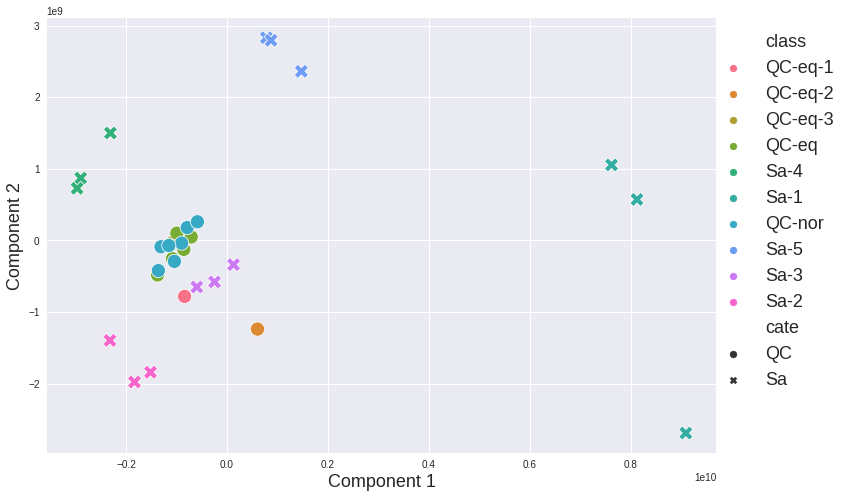

In [80]:
draw_pca(PCA().fit_transform(allsamples.T))

(-1, 32)

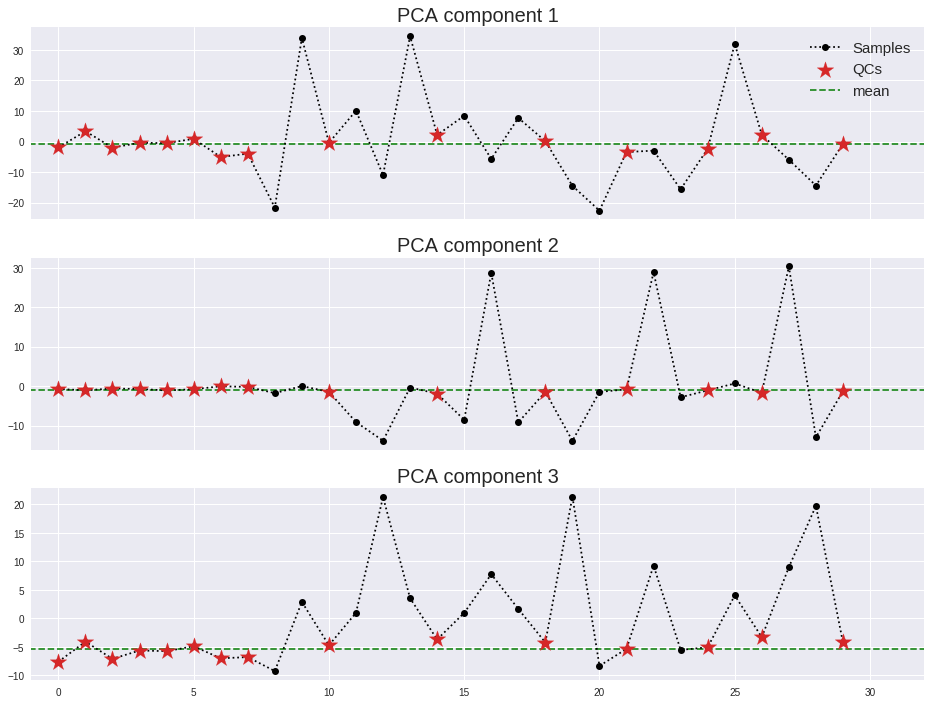

In [74]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(pca_mat[0], ':o', c='k', label='Samples')
ax1.scatter(pca_mat[pca_mat['cate'] == 'QC'].index, pca_mat[pca_mat['cate'] == 'QC'][0], marker='*', s=300, c='tab:red', zorder=10, label='QCs')
ax1.set_xticklabels([])
ax1.set_title('PCA component 1', fontsize=20)
ax1.hlines(pca_mat[pca_mat['cate'] == 'QC'][0].mean(), -10, 40, linestyle='--', color='forestgreen', label='mean')
ax1.set_xlim(-1,32)
ax1.legend(fontsize=15)

ax2.plot(pca_mat[1], ':o', c='k', )
ax2.scatter(pca_mat[pca_mat['cate'] == 'QC'].index, pca_mat[pca_mat['cate'] == 'QC'][1], marker='*', s=300, c='tab:red', zorder=10)
ax2.set_xticklabels([])
ax2.set_title('PCA component 2', fontsize=20)
ax2.hlines(pca_mat[pca_mat['cate'] == 'QC'][1].mean(), -10, 40, linestyle='--', color='forestgreen')
ax2.set_xlim(-1,32)

ax3.plot(pca_mat[2], ':o', c='k', )
ax3.scatter(pca_mat[pca_mat['cate'] == 'QC'].index, pca_mat[pca_mat['cate'] == 'QC'][2], marker='*', s=300, c='tab:red', zorder=10)
ax3.set_title('PCA component 3', fontsize=20)
ax3.hlines(pca_mat[pca_mat['cate'] == 'QC'][2].mean(), -10, 40, linestyle='--', color='forestgreen')
ax3.set_xlim(-1,32)
#plt.savefig('PCA_123.png')

In [111]:
lm_test = test.sort_values(by='R2_modified', ascending=False).iloc[[2]][['0.10', '0.15', '0.30', '0.50', '0.75', '1.00']].T

In [112]:
lm_test['x'] = [0.1, 0.15, 0.3, 0.5, 0.75, 1]

In [123]:
lm_test.rename({lm_test.columns[0]:'y'}, axis=1)

y     x
0.10           NaN  0.10
0.15           NaN  0.15
0.30  4.851030e+05  0.30
0.50  8.736672e+05  0.50
0.75  1.282589e+06  0.75
1.00  1.730982e+06  1.00

In [76]:
test.sort_values(by='R2_modified', ascending=False).iloc[[2000]]

F_index           0.10           0.15           0.30         0.50  \
5390  FT5391  483847.483792  576890.909517  910166.039062  699121.6328   

              0.75          1.00        R2  normal?  R2_modified  
5390  2.683665e+06  3.254355e+06  0.856094     True     0.856094

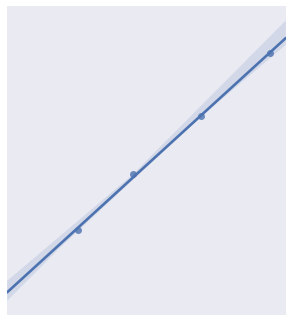

In [114]:
sns.lmplot('x', 'y', data=lm_test)
plt.yticks([])
plt.xticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig('filter_illus.png')

In [132]:
def get_R2_final(x):
    x = x.fillna(-1)

    y_i = np.array([0.1, 0.15, 0.3, 0.5, 0.75, 1])
    
    y_hat = x / x[-1]
    
    pivot = 0
    for i in range(6):
        if not  x[i] == -1:
            pivot = i
            break
           
    y_i = y_i[pivot:]
    y_hat = y_hat[pivot:]
    return r2_score(y_i, y_hat)

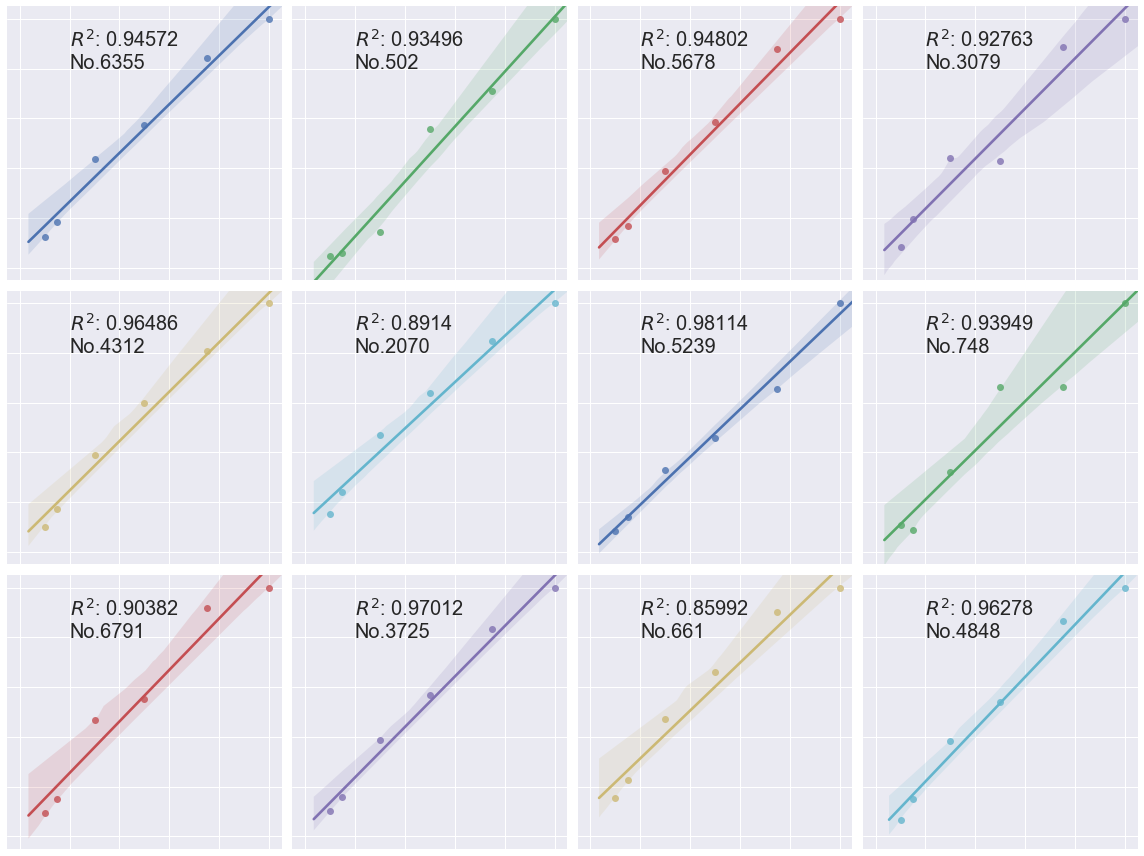

In [159]:
fig = plt.figure(figsize=(16,12))
axs = []
df = test.sort_values(by='R2_modified', ascending=False)[:2000].sample(12)
indices = df.index[:12]
for i in range(12):
    axs.append(fig.add_subplot(3, 4, i+1))

for i, ax in enumerate(axs):
    lm_test = df.loc[[indices[i]]][['0.10', '0.15', '0.30', '0.50', '0.75', '1.00']].T
    lm_test['x'] = [0.1, 0.15, 0.3, 0.5, 0.75, 1]
    lm_test = lm_test.rename({lm_test.columns[0]:'y'}, axis=1)
    lm_test['y'] = lm_test['y'] / lm_test['y'][-1]
    
    sns.regplot('x', 'y', data=lm_test, ax=ax)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-.05, 1.05)
    
    R2 = get_R2_final(lm_test['y'])
    R2 = round(R2, 5)
    
    index = indices[i]
    
    ax.text(.2, .8, '$R^2$: %s\nNo.%s' % (R2, index), fontsize=20)
    
plt.tight_layout()
plt.savefig('12lmplot.png', dpi=96)

In [11]:
xx = np.linspace(0, 25, 1000)
yy = np.zeros(1000)

In [12]:
for i, x in enumerate(xx):
    if x < 2:
        yy[i] = 2
    if 2 <= x < 8:
        yy[i] = 2 + (x-2) * 8
    if 8 <= x < 16:
        yy[i] = 50
    if 16 <= x < 17:
        yy[i] = 50 + (x-16) * 48
    if 17 <= x < 21:
        yy[i] = 98
    if 21 <= x < 21.1:
        yy[i] = 98 - (x-21) * 960
    if x >= 21.1:
        yy[i] = 2

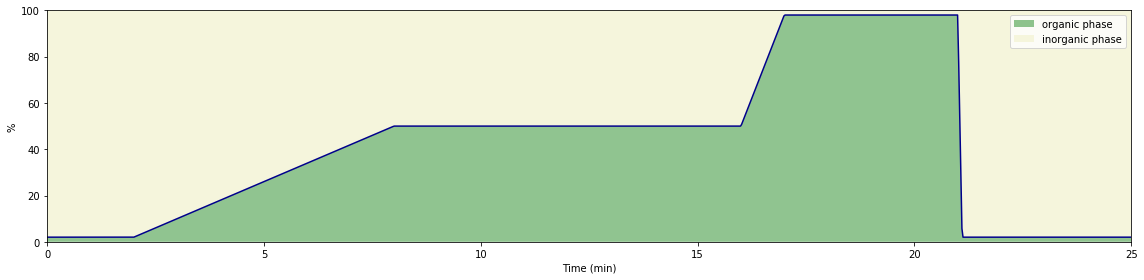

In [33]:
plt.figure(figsize=(16, 4))
plt.plot(xx, yy, c='darkblue')
plt.fill_between(xx, 0, yy, facecolor='forestgreen', alpha=.5, label='organic phase')
plt.fill_between(xx, yy, 100, facecolor='beige', alpha=1, label='inorganic phase')
plt.xlim(0,25)
plt.ylim(0,100)
plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('%')
plt.tight_layout()
plt.savefig('gradient.png')

In [268]:
now = time.strftime('%H %M-%d%h')
dill.dump_session('%s.jupyterData' % now)

# PCA

In [265]:
def deal_names(cols):
    re = []
    for i, name in enumerate(cols):
        if i in [0, 1, 2]:
            re.append('QC-eq-%s' % str(i+1))
        elif i in [3, 4, 5, 6, 7]:
            re.append('QC-eq')
        elif name.startswith('Sa'):
            name = name[:10]
            re.append('Sa-%s' % name[-3])
        else:
            re.append('QC-nor')
    
    return re

def draw_pca(mat):
    PCA_allsamples = PCA(whiten=False).fit_transform(mat)
    names = deal_names(allsamples.columns)
    colormap = {'QC-eq-1': ['darkred',True], 'QC-eq-2':['red', True], 'QC-eq-3':['lightcoral', True], 
            'QC-eq': ['gold', True], 'QC-nor': ['olive', True], 
           'Sa-1': ['plum', True], 'Sa-2': ['skyblue', True], 'Sa-3': ['teal', True], 'Sa-4': ['forestgreen', True], 'Sa-5': ['peru', True]}
    pca_mat = pd.DataFrame(PCA_allsamples)

    pca_mat['class'] = names
    pca_mat['cate'] = pca_mat['class'].str[:2]
    
    fig, axs = plt.subplots(1,2, figsize=(16,6))
    
    ax = axs[0]
    scatters = sns.scatterplot(0, 1, hue='class', style='cate', data=pca_mat, s=200, ax=ax)
    ax.legend(fontsize=18, bbox_to_anchor=[1,1, .2, 0])
    ax.set_xlabel('Component 1', fontsize=18)
    ax.set_ylabel('Component 2', fontsize=18) 
    
    ax = axs[1]
    sns.scatterplot(0, 1, hue='class', style='class', data=pca_mat[pca_mat['cate']=='QC'], s=200, ax=ax)
    ax.legend(fontsize=18)
    ax.set_xlabel('Component 1', fontsize=18)
    ax.set_ylabel('Component 2', fontsize=18)
    plt.tight_layout()
    return pca_mat

def draw_trend(pca_mat):
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)

    ax1.plot(pca_mat[0], ':o', c='k', label='Samples')
    ax1.scatter(pca_mat[pca_mat['cate'] == 'QC'].index, pca_mat[pca_mat['cate'] == 'QC'][0], marker='*', s=300, c='tab:red', zorder=10, label='QCs')
    ax1.set_xticklabels([])
    ax1.set_title('PCA component 1', fontsize=20)
    ax1.hlines(pca_mat[pca_mat['cate'] == 'QC'][0].mean(), -10, 40, linestyle='--', color='forestgreen', label='mean')
    ax1.set_xlim(-1,32)
    ax1.legend(fontsize=15)

    ax2.plot(pca_mat[1], ':o', c='k', )
    ax2.scatter(pca_mat[pca_mat['cate'] == 'QC'].index, pca_mat[pca_mat['cate'] == 'QC'][1], marker='*', s=300, c='tab:red', zorder=10)
    ax2.set_xticklabels([])
    ax2.set_title('PCA component 2', fontsize=20)
    ax2.hlines(pca_mat[pca_mat['cate'] == 'QC'][1].mean(), -10, 40, linestyle='--', color='forestgreen')
    ax2.set_xlim(-1,32)

    ax3.plot(pca_mat[2], ':o', c='k', )
    ax3.scatter(pca_mat[pca_mat['cate'] == 'QC'].index, pca_mat[pca_mat['cate'] == 'QC'][2], marker='*', s=300, c='tab:red', zorder=10)
    ax3.set_title('PCA component 3', fontsize=20)
    ax3.hlines(pca_mat[pca_mat['cate'] == 'QC'][2].mean(), -10, 40, linestyle='--', color='forestgreen')
    ax3.set_xlim(-1,32)

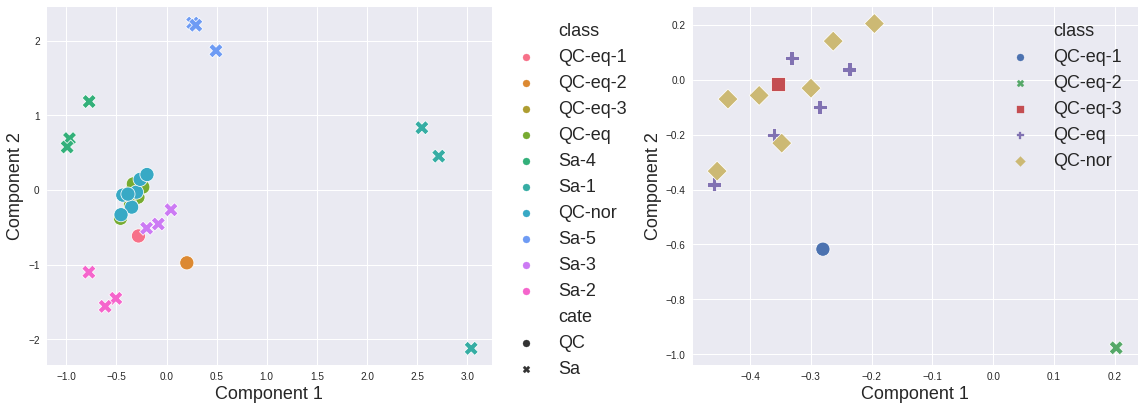

In [169]:
pca_mat = draw_pca(allsamples.T)

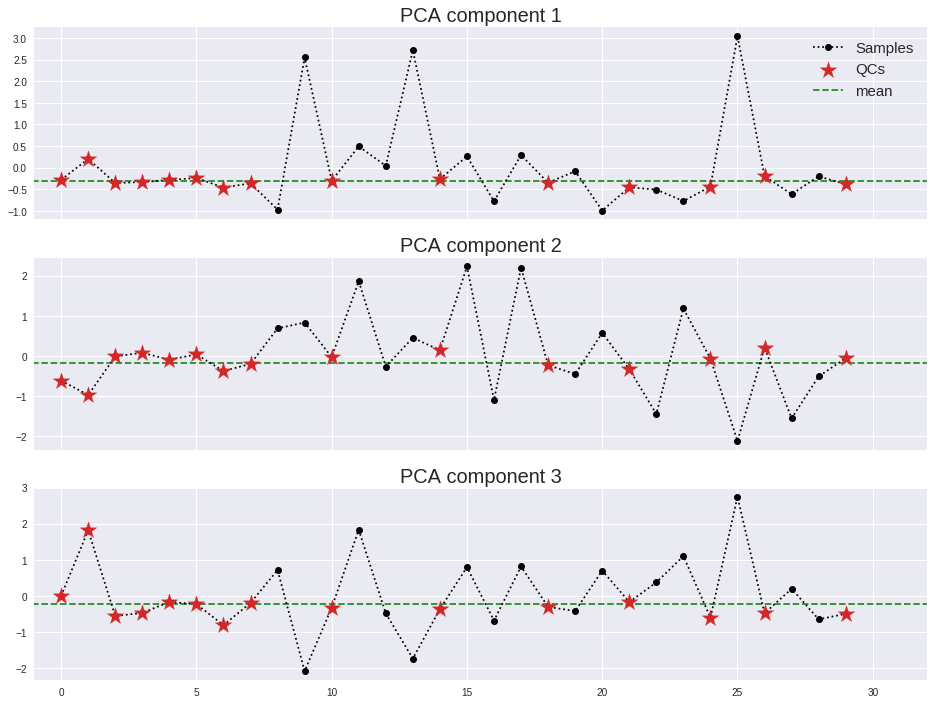

In [170]:
draw_trend(pca_mat)

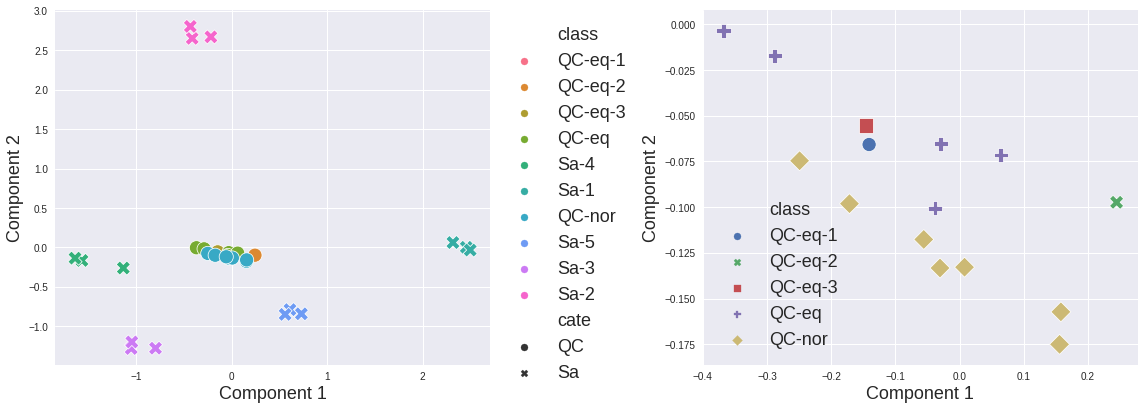

In [171]:
pca_mat = draw_pca(np.log(allsamples.T))

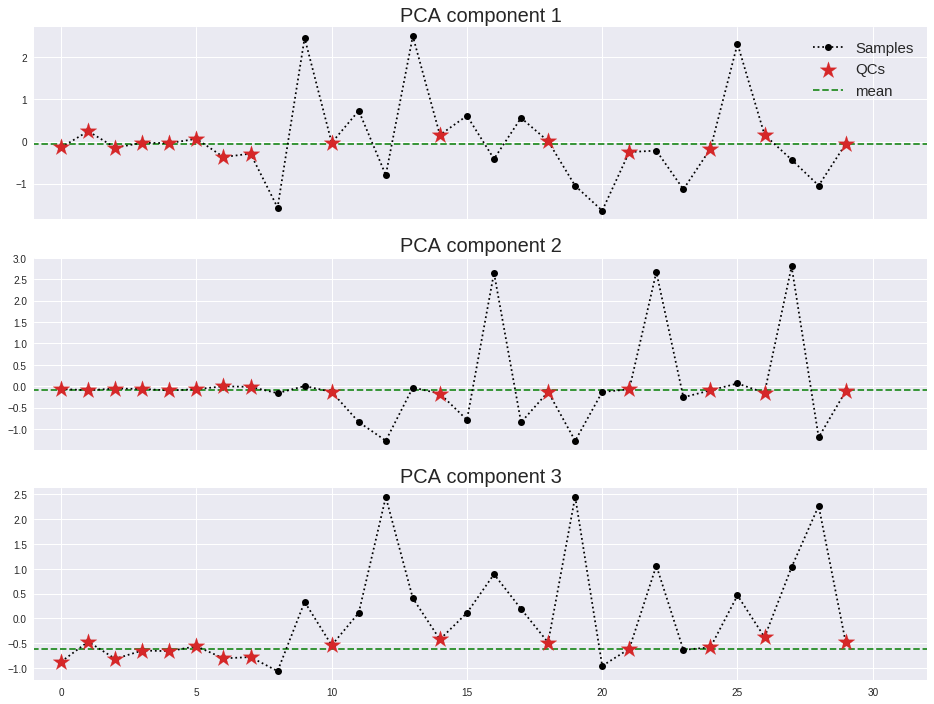

In [172]:
draw_trend(pca_mat)

In [142]:
f = allsamples.T.values

## 平衡conc, dropna

In [143]:
f1 = f / (f.sum(1) / f.sum(1).max())[:, np.newaxis]

In [144]:
f1.shape

(30, 1361)

### 只平衡

In [217]:
f11 = f1

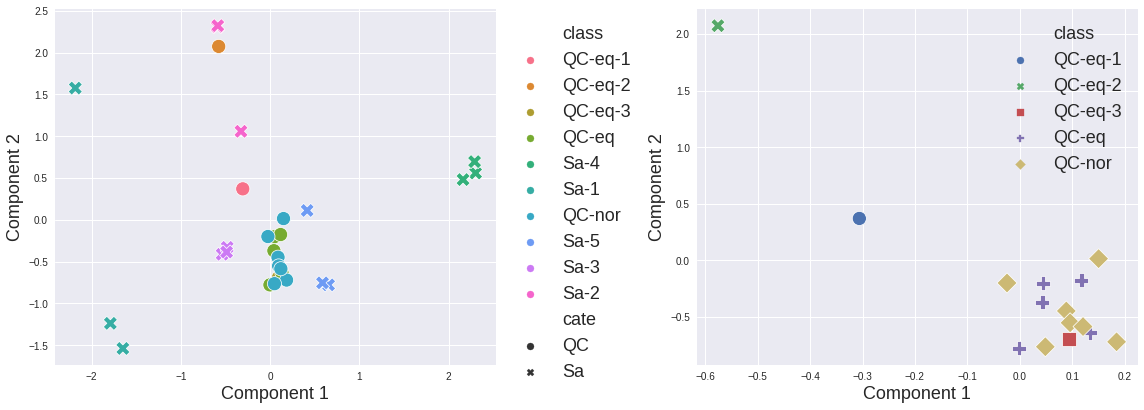

In [218]:
pca_mat = draw_pca(f11)

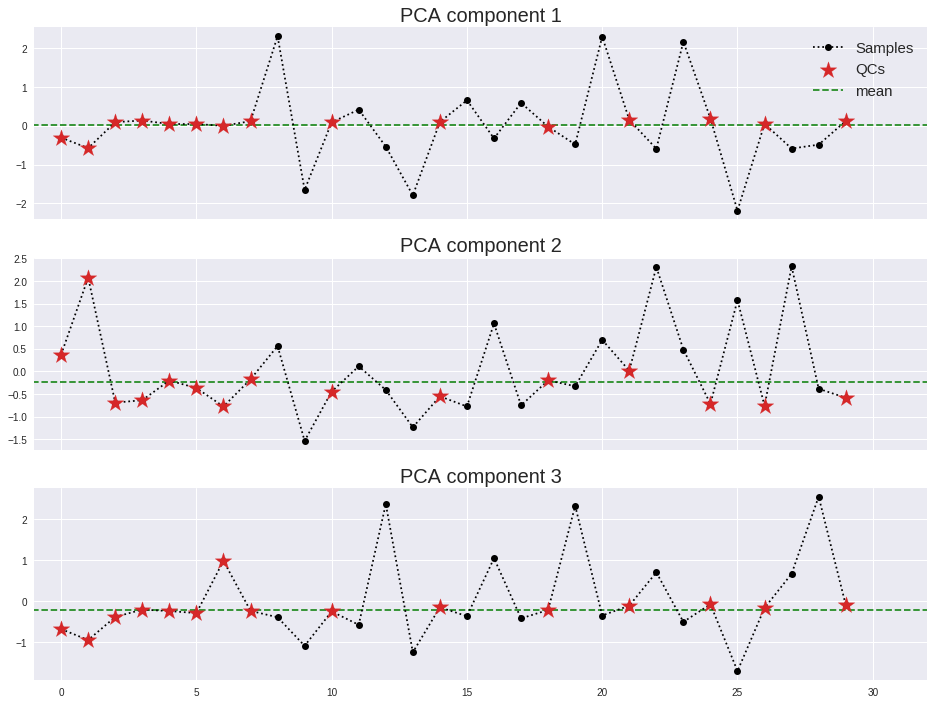

In [219]:
draw_trend(pca_mat)

### 先平衡再log

In [220]:
f12 = np.log(f1)

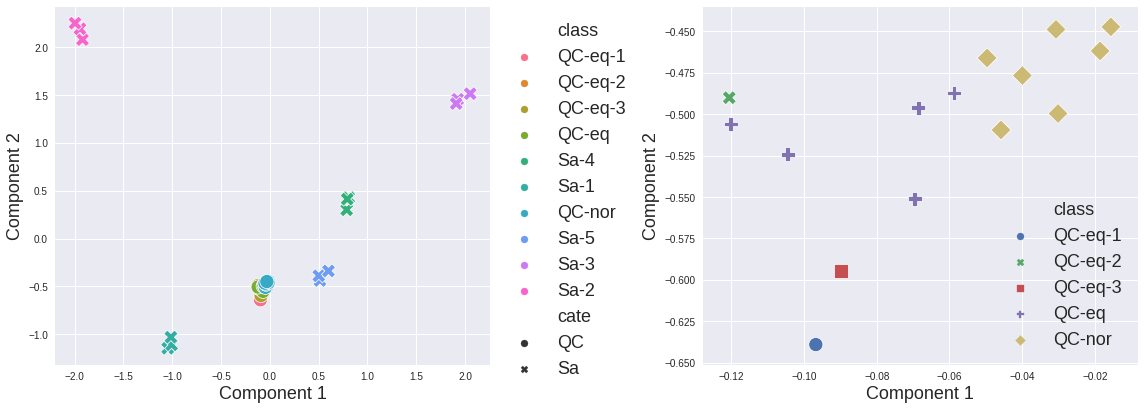

In [221]:
pca_mat = draw_pca(np.log(f12))

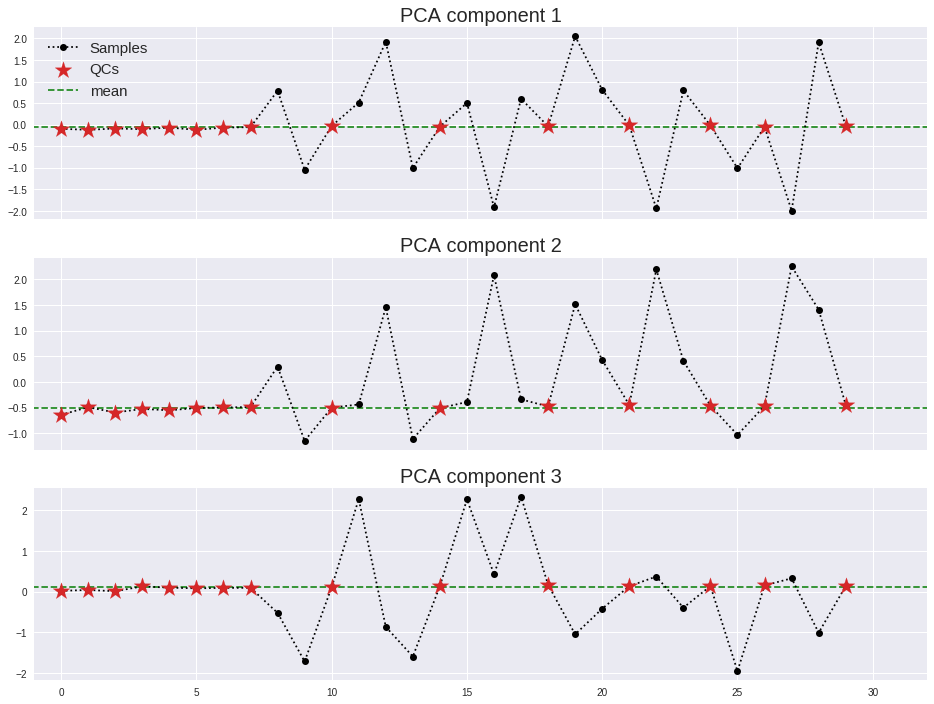

In [222]:
draw_trend(pca_mat)

### 先log再平衡

In [223]:
f13 = np.log(f)

In [224]:
f13 = f13 / (f13.sum(1) / f13.sum(1).max())[:, np.newaxis]

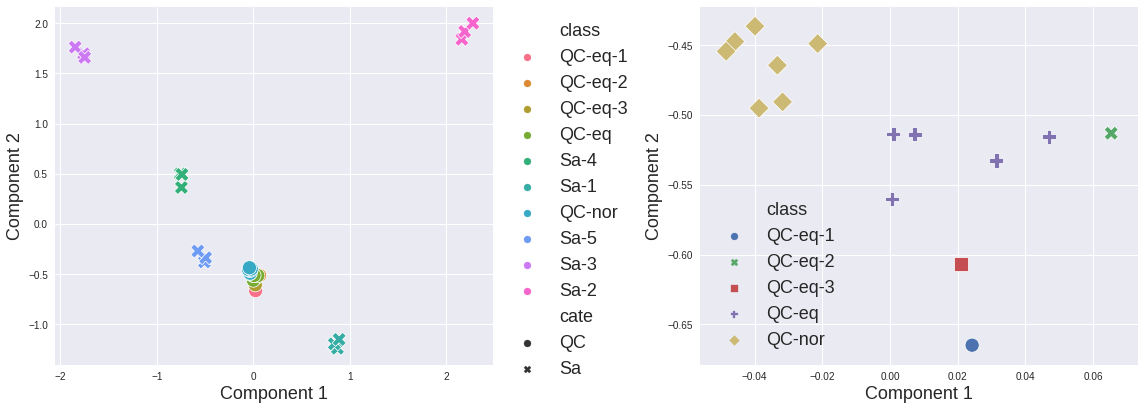

In [226]:
pca_mat = draw_pca(f13)

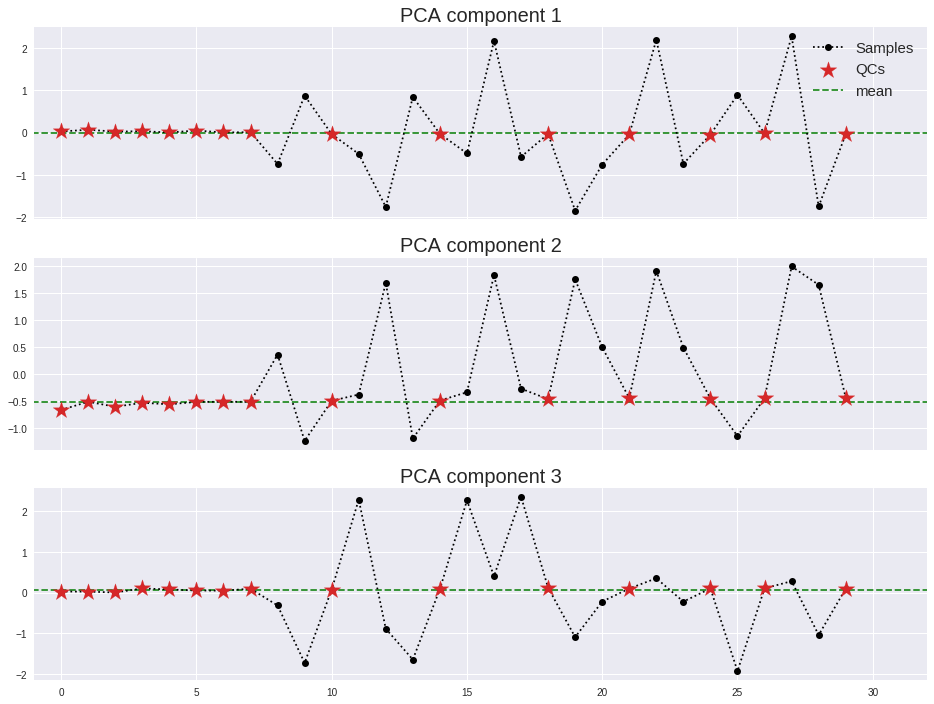

In [228]:
draw_trend(pca_mat)

## 平衡feature intensity, fropna

### 先平衡feature

In [243]:
sum_median = np.median(f.max(0))

In [242]:
np.median(f.sum(0))

131082744.4381597

In [245]:
factors = f.sum(0) / sum_median

In [246]:
factors.shape

(1361,)

In [253]:
f21 = (f / factors)

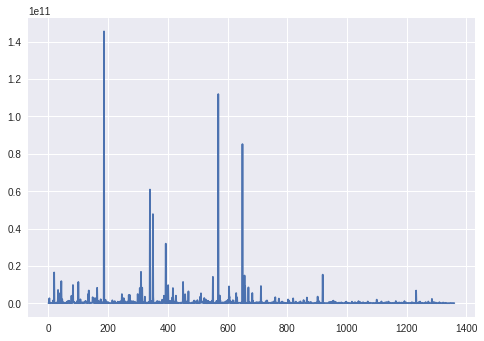

In [239]:
plt.plot(f.sum(0))

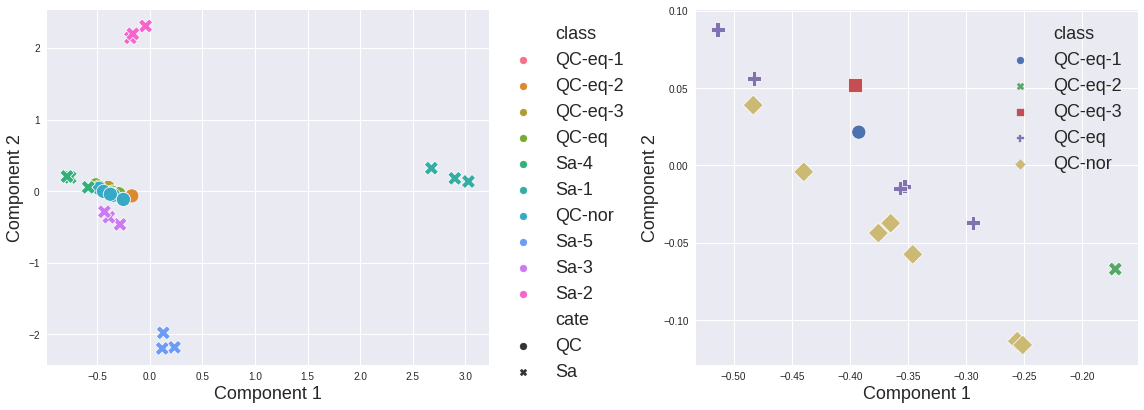

In [257]:
pca_mat = draw_pca(f21)

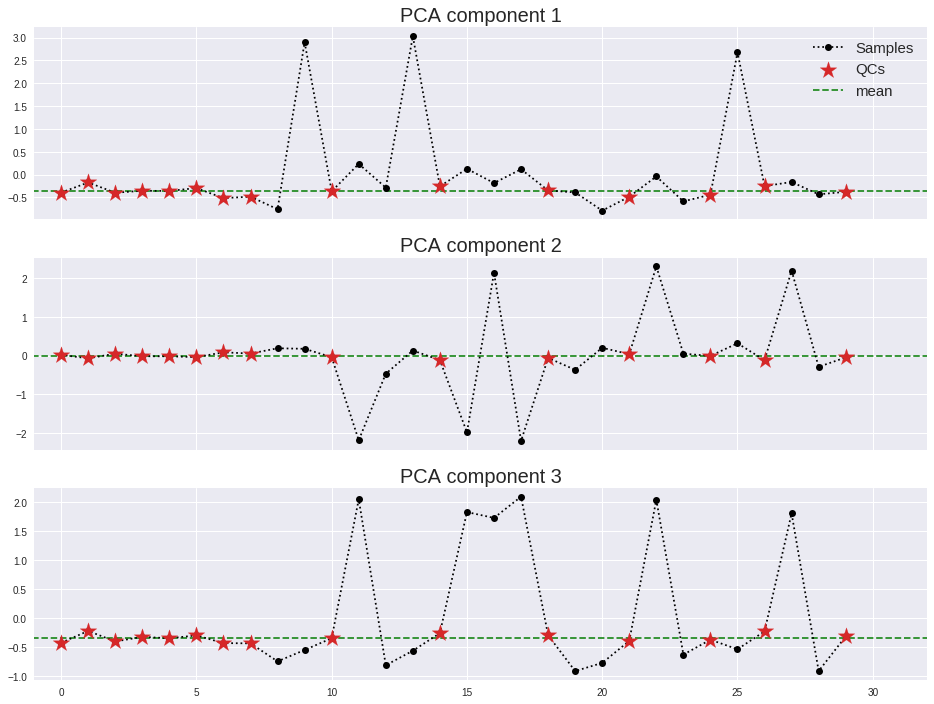

In [258]:
draw_trend(pca_mat)

### 平衡后再log

In [266]:
f22 = np.log(f21)

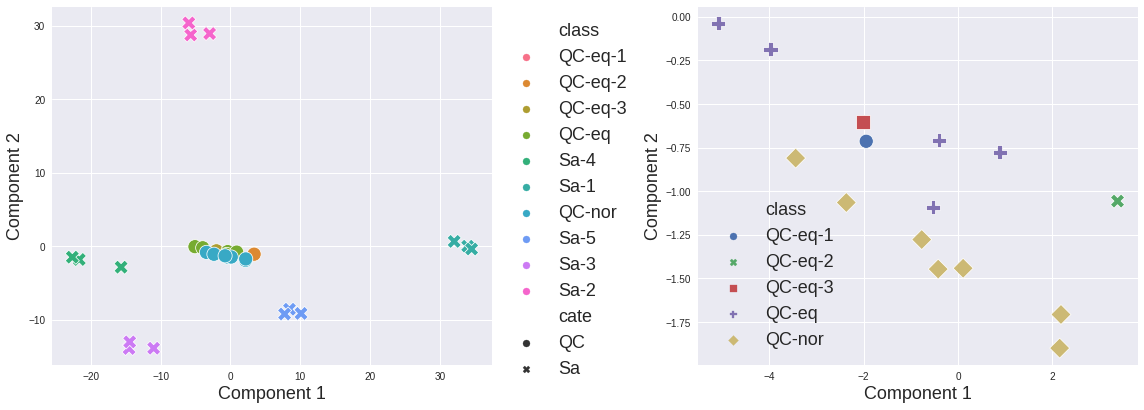

In [267]:
pca_mat = draw_pca(f22)

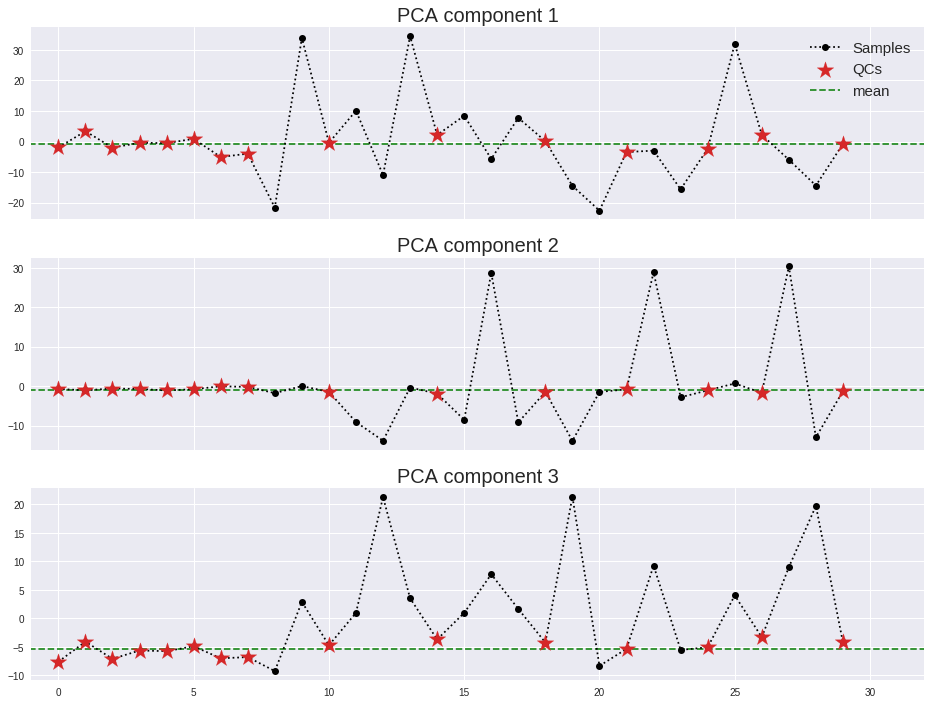

In [268]:
draw_trend(pca_mat)

### 先log 后平衡feature

In [264]:
f.shape

(30, 1361)

## StandardScaler

In [269]:
from sklearn.preprocessing import StandardScaler

In [272]:
f0 = StandardScaler().fit_transform(f)

### 只StandardScaler

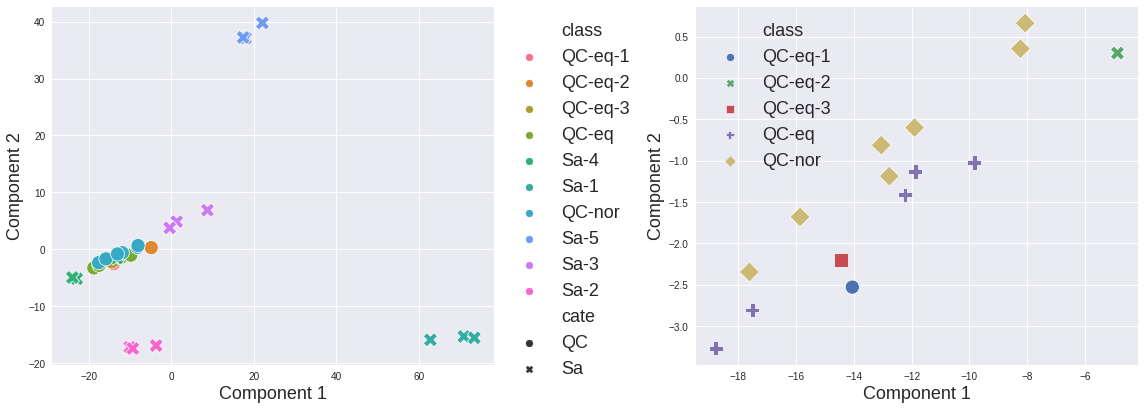

In [282]:
pca_mat = draw_pca(f0)

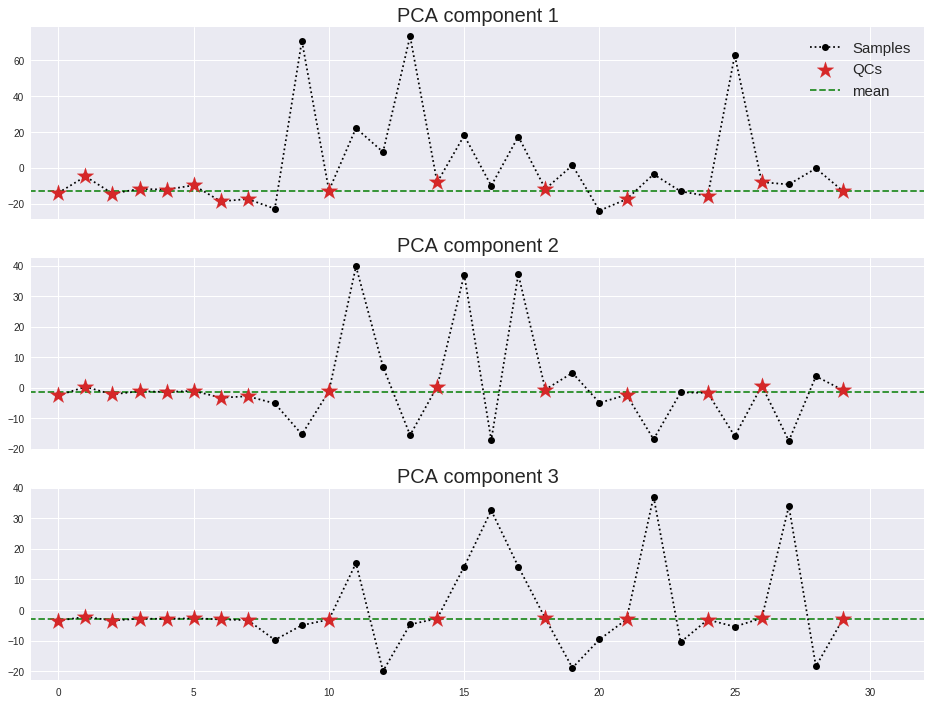

In [283]:
draw_trend(pca_mat)

### log后 StandardScaler

In [285]:
f01 = StandardScaler().fit_transform(np.log(f))

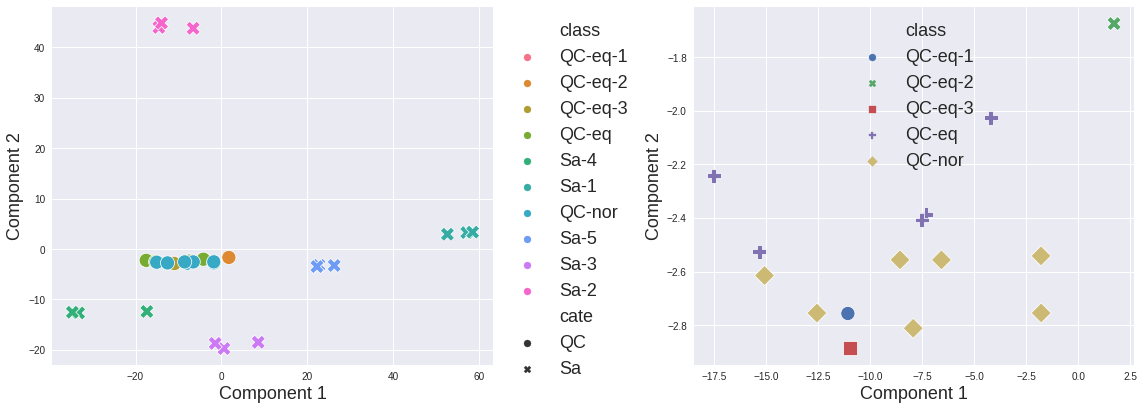

In [289]:
pca_mat = draw_pca(f01)

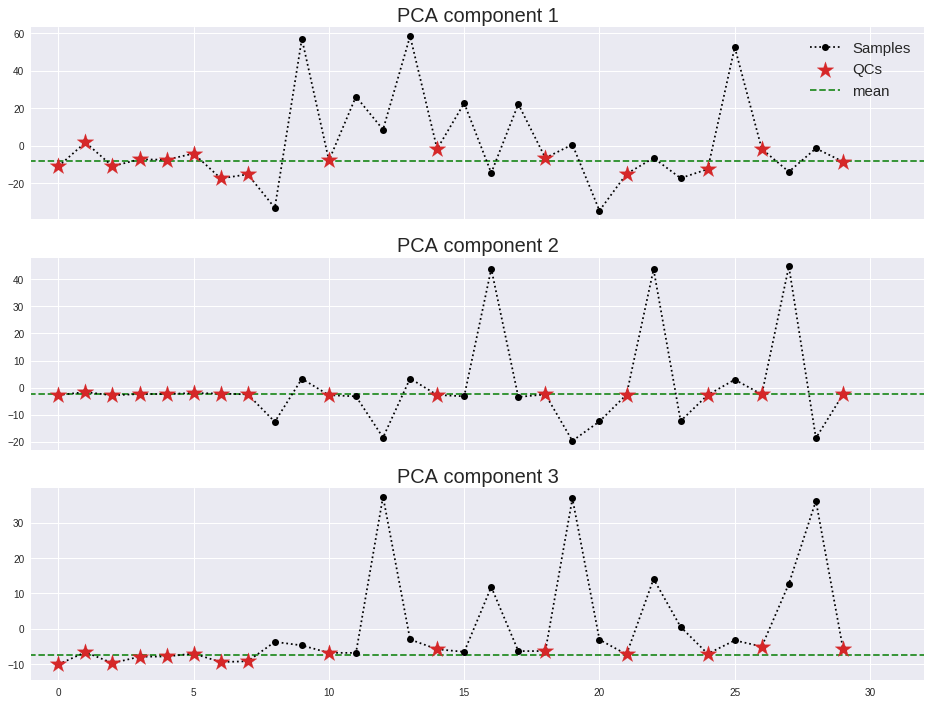

In [290]:
draw_trend(pca_mat)

### 平衡conc后 StandardScaler(没有log)
**也许是最好的**

In [296]:
f3 = f / (f.sum(1) / f.sum(1).max())[:, np.newaxis]

In [297]:
f33 = StandardScaler().fit_transform(f3)

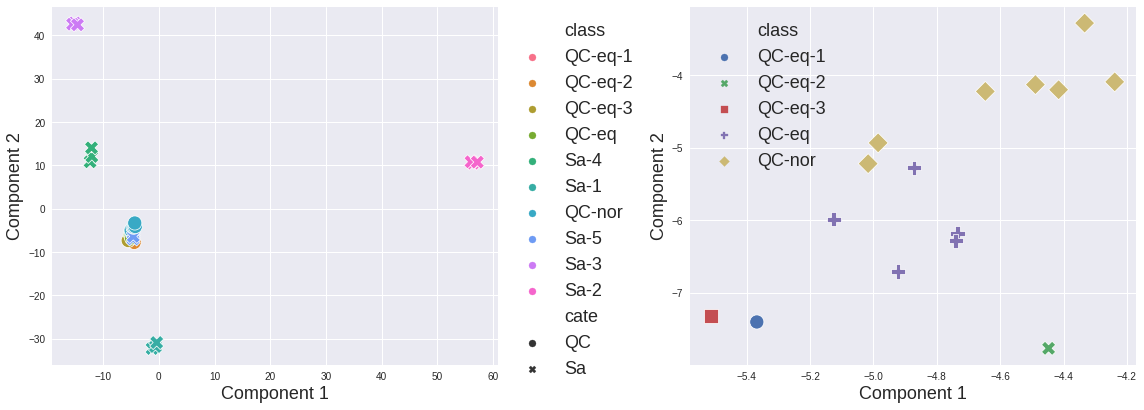

In [300]:
pca_mat = draw_pca(f33);

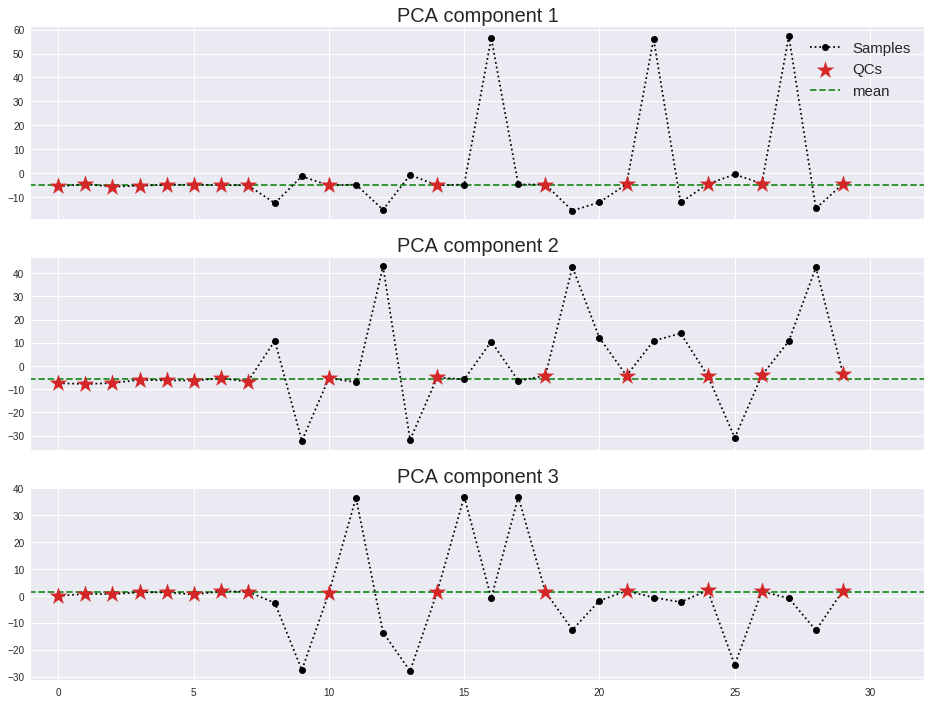

In [303]:
draw_trend(pca_mat)

### 平衡conc后 log-> StandardScaler

In [304]:
f34 = StandardScaler().fit_transform(np.log(f3))

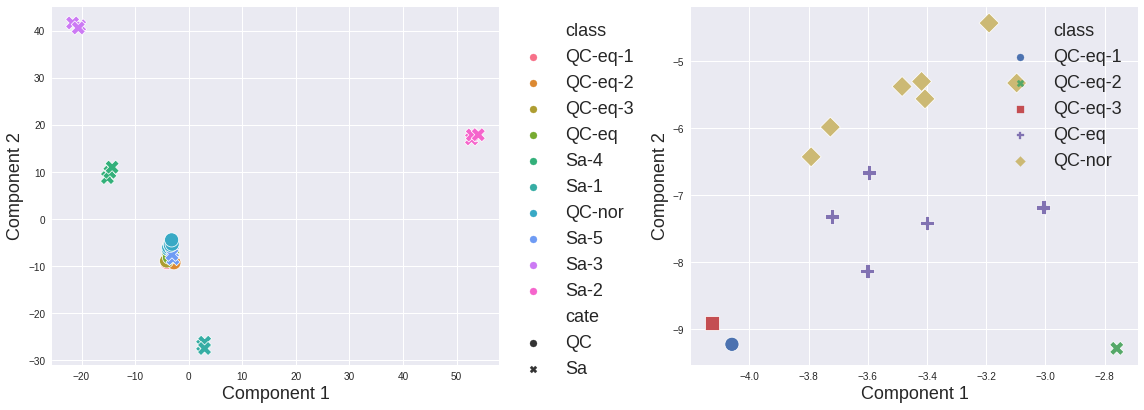

In [305]:
pca_mat = draw_pca(f34)

In [312]:
def draw_all(df):
    f = df.T.values
    f = f / (f.sum(1) / f.sum(1).max())[:, np.newaxis]
    f = StandardScaler().fit_transform(f)
    
    pca_mat = draw_pca(f)
    draw_trend(pca_mat)

# 测试不同的pass集合

## 1361 dropna

In [ ]:
draw_all(allsamples)

In [318]:
i5000 = t[t[0] > .8].index
i2000 = test2[test2['R2'] > .8].index

In [328]:
ints = into.iloc[:, 1:]

In [329]:
ints = ints.loc[:, allsamples.columns]

In [332]:
ints.loc[i2000]

(2472, 30)

In [345]:
QCs_nor.columns

Index(['QC_3_1.mzXML', 'QC_1_2.mzXML', 'QC_5_3.mzXML', 'QC_3_3.mzXML',
       'QC_3_2.mzXML', 'QC_4_3.mzXML', 'QC_4_1.mzXML'],
      dtype='object')

In [375]:
QCs_nor.dropna(how='all').shape

(8654, 7)

In [398]:
index = allsamples.index
qc = QCs_nor.copy().dropna().T.values
pivot = QCs_nor.copy().loc[index].T.values

In [399]:
qc = qc / (pivot.sum(1) / pivot.sum(1).max())[:, np.newaxis]

In [400]:
qc = pd.DataFrame(qc, index=QCs_nor.dropna().columns, columns=QCs_nor.dropna().index).T

In [401]:
qc['mag'], qc['mean'], qc['RSD'] = qc.apply(RSD_modified, axis=1).str

In [402]:
QCs_pass[QCs_pass['RSD']<.2].shape

(1552, 10)

In [383]:
allsamples.index

Int64Index([   4,   37,   46,   47,   54,   99,  104,  105,  106,  120,
            ...
            8576, 8577, 8584, 8585, 8586, 8629, 8646, 8655, 8656, 8661],
           dtype='int64', length=1361)

In [406]:
QCs_pass.head()

QC_3_1.mzXML  QC_1_2.mzXML  QC_5_3.mzXML  QC_3_3.mzXML  QC_3_2.mzXML  \
0   8.141080e+05  1.156538e+06  1.569365e+06  8.816941e+05  1.363546e+06   
4   1.166541e+06  1.142337e+06  9.435037e+05  9.190509e+05  1.014086e+06   
37  5.787743e+06  5.979151e+06  5.927333e+06  4.852812e+06  4.929256e+06   
38  2.039050e+05  2.909821e+05  2.698218e+05  2.449131e+05  3.751254e+05   
40  1.384049e+07  3.403267e+06  2.950691e+06  2.707654e+06  3.012815e+06   

    QC_4_3.mzXML  QC_4_1.mzXML  mag          mean       RSD  
0   1.910976e+06  1.282357e+06    6  1.282655e+06  0.298533  
4   1.035705e+06  1.088108e+06    6  1.044190e+06  0.090269  
37  6.116012e+06  5.456045e+06    6  5.578336e+06  0.091935  
38  4.189614e+05  3.823470e+05    5  3.122937e+05  0.257432  
40  3.027967e+06  3.012844e+06    6  4.565104e+06  0.897053

In [414]:
_ = qc.loc[qc.index & i2000]

In [415]:
_[_['RSD'] < .2].shape

(1640, 10)

In [416]:
_.shape

(2353, 10)

In [426]:
8591 in _.index

True

In [440]:
_.shape

(2353, 10)

## 1426 dropna

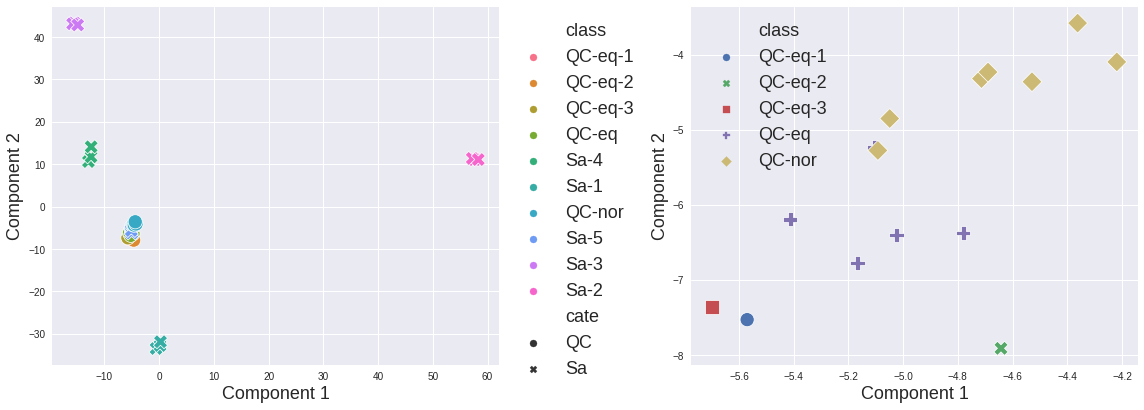

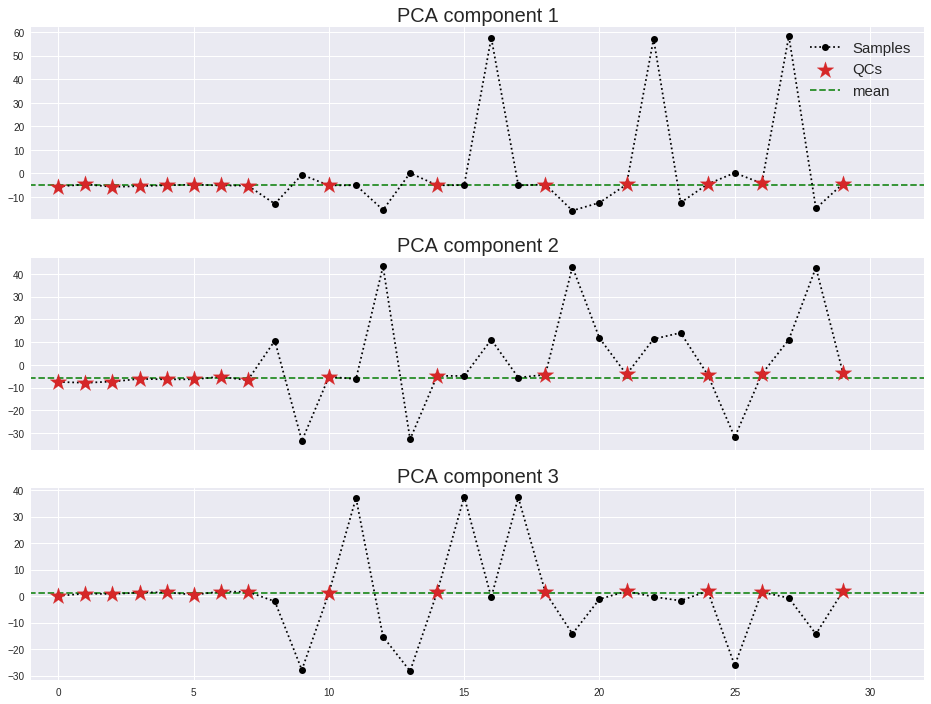

In [436]:
draw_all(ints.loc[_[_['RSD'] < .2].index].dropna())

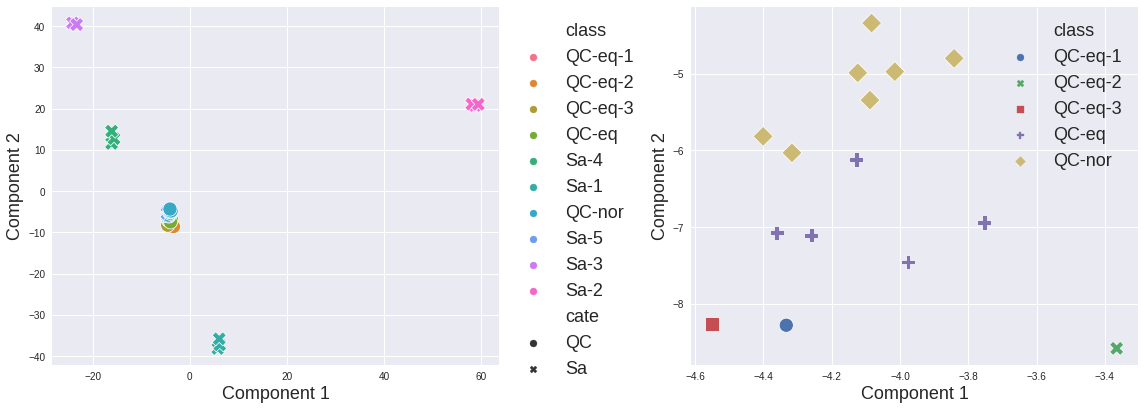

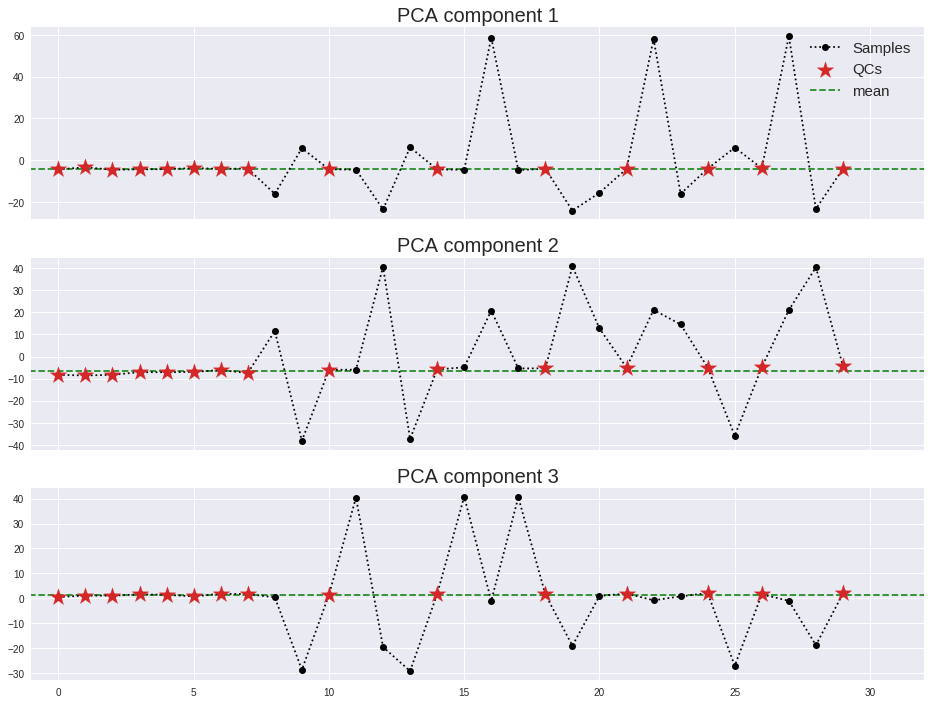

In [443]:
draw_all(ints.loc[_[_['RSD'] < .2].index].fillna(0))

In [533]:
f_t = pd.DataFrame(f3, index=allsamples.columns, columns=allsamples.index).T

In [534]:
f_t.columns = names

In [535]:
f_t.columns

Index(['QC-eq-1', 'QC-eq-2', 'QC-eq-3', 'QC-eq', 'QC-eq', 'QC-eq', 'QC-eq',
       'QC-eq', 'Sa-4', 'Sa-1', 'QC-nor', 'Sa-5', 'Sa-3', 'Sa-1', 'QC-nor',
       'Sa-5', 'Sa-2', 'Sa-5', 'QC-nor', 'Sa-3', 'Sa-4', 'QC-nor', 'Sa-2',
       'Sa-4', 'QC-nor', 'Sa-1', 'QC-nor', 'Sa-2', 'Sa-3', 'QC-nor'],
      dtype='object')

In [536]:
s1 = f_t['Sa-1']
s2 = f_t['Sa-2']
s3 = f_t['Sa-3']
s4 = f_t['Sa-4']
s5 = f_t['Sa-5']

# T test

## s1 and s2

In [537]:
import statsmodels.api as sm

In [576]:
ttest = sm.stats.ttest_ind(s1.T, s2.T)

In [27]:
pvalues_fdr_bh = sm.stats.multipletests(ttest[1], alpha=.05, method='fdr_bh')[1]

In [28]:
pvalues_fdr_bh[pvalues_fdr_bh < .05].shape

(1011,)

In [29]:
pvalues = -np.log10(pvalues_fdr_bh)

In [30]:
times = np.log2(s1.mean(1) / s2.mean(1)).values

In [153]:
def volcano_plot(times, pvalues, **kwargs):
    sns.scatterplot(times, pvalues, **kwargs)

In [33]:
plt.style.use('seaborn')

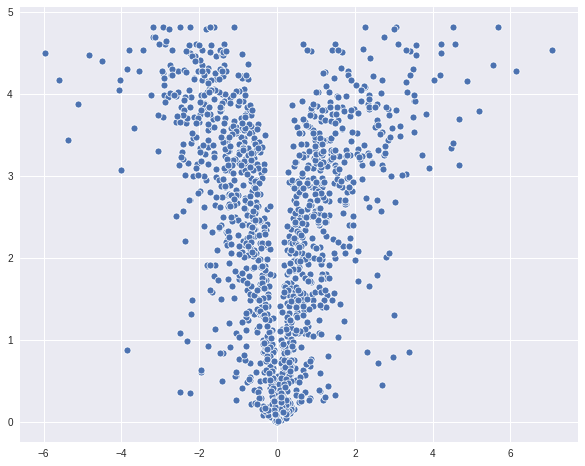

In [36]:
plt.figure(figsize=(10,8))
volcano_plot(times, pvalues)

In [94]:
-np.log10(0.05)

1.3010299956639813

In [96]:
np.log2(10)

3.321928094887362

Text(3.7, 2, 'p<0.05\nfold change > 10')

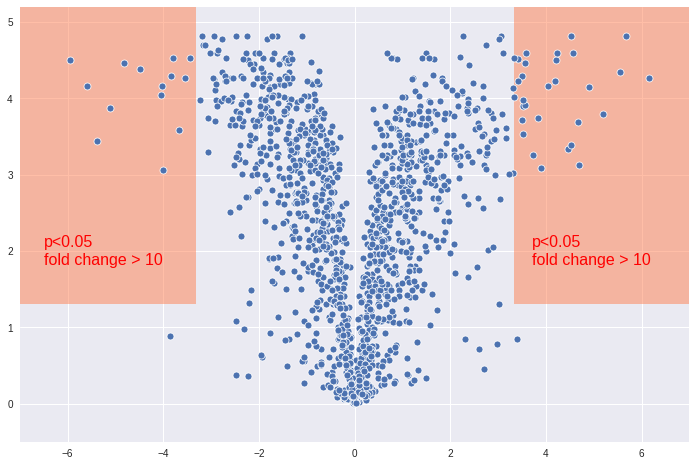

In [161]:
plt.figure(figsize=(12,8))
volcano_plot(times, pvalues, zorder=10)
plt.fill_between(np.linspace(-100, -np.log2(10)), np.ones([50])*-np.log10(5e-2), np.ones([50])*-np.log10(5e-6), facecolor='coral', alpha=.5, zorder=1)
plt.fill_between(np.linspace(np.log2(10), 100), np.ones([50])*-np.log10(5e-2), np.ones([50])*-np.log10(5e-6), facecolor='coral', alpha=.5, zorder=1)
plt.xlim(-7,7)
plt.ylim(-.5, 5.2)
plt.text(-6.5, 2, 'p<0.05\nfold change > 10', fontsize=16, ha='left', va='center', color='r')
plt.text(3.7, 2, 'p<0.05\nfold change > 10', fontsize=16, ha='left', va='center', color='r')

In [584]:
ttest[1].argsort()

array([273, 958, 116, ..., 848, 243, 576])

In [586]:
s1.iloc[273]

Sa-1    4.153093e+08
Sa-1    4.057322e+08
Sa-1    4.050373e+08
Name: 2523, dtype: float64

In [587]:
s2.iloc[273]

Sa-2    7.936802e+06
Sa-2    7.513450e+06
Sa-2    8.435348e+06
Name: 2523, dtype: float64

In [141]:
df = pd.read_csv('OPLS.csv', index_col=0)

## PLS

In [20]:
from sklearn.cross_decomposition import PLSRegression

In [21]:
pls = PLSRegression(n_components=2)
res = pls.fit(pd.concat([s1.T, s2.T, s3.T, s4.T, s5.T]), [0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1])

In [41]:
pls_mat = pd.DataFrame(res.x_scores_)

pls_mat['c'] = [0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1]

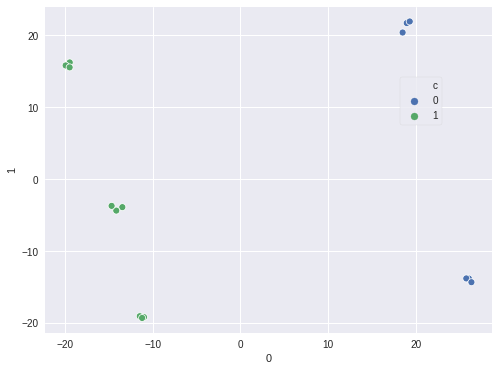

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(0, 1, data=pls_mat, hue='c')
legend = plt.gca().get_legend()
legend.set_bbox_to_anchor([.9, .8])
legend.set_frame_on(True)

## RandomForest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf = RandomForestClassifier(n_estimators=20000, n_jobs=-1, max_depth=1)

In [122]:
rf.fit(df.iloc[:, :-1].values, df.iloc[:, -1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
fi = rf.feature_importances_

In [124]:
fi = pd.DataFrame(fi).rename({0: 'var'}, axis=1)

In [30]:
fi['c'] = pd.cut(fi['var'], 10)
fi['c'] = np.where(fi['c'] == pd.cut(fi['var'], 10).value_counts().index[0], 0, 1)

In [9]:
pd.cut(fi['var'], 10).value_counts()

(-4.75e-06, 0.000475]    1019
(0.00332, 0.0038]          84
(0.0038, 0.00428]          64
(0.000475, 0.00095]        50
(0.00285, 0.00332]         43
(0.00095, 0.00142]         36
(0.00142, 0.0019]          35
(0.0019, 0.00238]          15
(0.00428, 0.00475]         11
(0.00238, 0.00285]          4
Name: var, dtype: int64

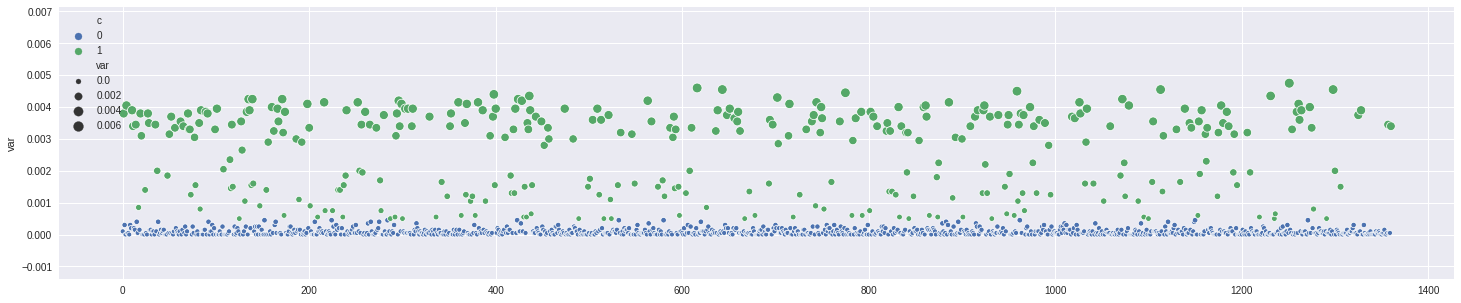

In [35]:
plt.figure(figsize=(25,5))
sns.scatterplot(x=range(fi.shape[0]), y='var', data=fi, hue='c', size='var')
#plt.savefig('feature_importance.png')

In [37]:
fi.index = df.columns[:-1]

In [13]:
fd_final = fd.loc[allsamples.index]

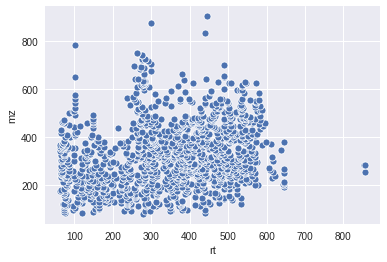

In [4]:
sns.scatterplot(x='rt', y='mz', data=fd_final)

In [17]:
fd_final = fd_final.join(fi, on=fi.index)

(50, 1000)

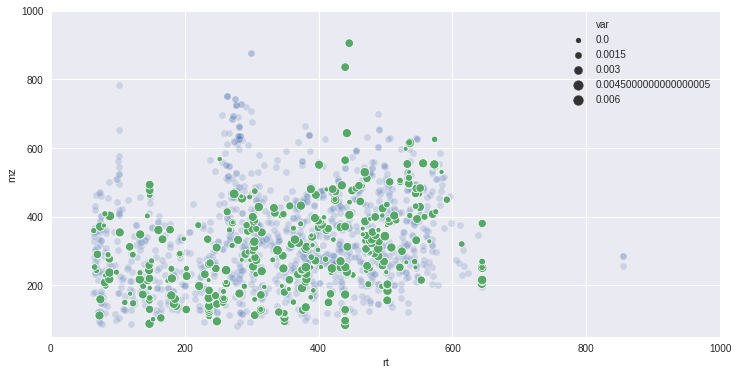

In [57]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='rt', y='mz', data=fd_final[fd_final['c']==0], alpha=.2, )
sns.scatterplot(x='rt', y='mz', data=fd_final[fd_final['c']==1], size='var')
plt.xlim(0, 1000)
plt.ylim(50, 1000)

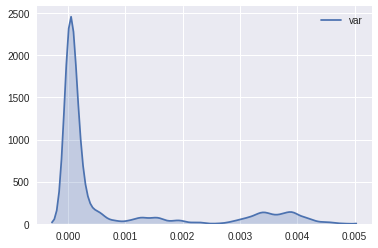

In [36]:
sns.kdeplot(fi['var'], shade=True)

# Isotopes, Adducts and Neutral loss

## Find isotopes

In [33]:
mzs = fd_final['mz'].values

In [34]:
mat = pd.DataFrame(mzs[:, None] - mzs)

In [35]:
def iso(x):
    x = x.values[:x.name][::-1]
    l = len(x)
    res = {}
    Da = 1.0034
    
    for i, x0 in enumerate(x):
        i = l-i-1
        if x0 > 5.1:
            break
        n = round(x0)
        sub = np.abs(Da*n - x0)
        if sub < 0.01 and round(x0)>0:
            res[i] = int(round(x0))
            
    if res:
        return res

In [36]:
def match_rt(x):
    d = x[0]    
    for x0 in list(d):
        sub = fd_final.iloc[x0, 4] - fd_final.iloc[x.name, 4]
        if np.abs(sub) > .5:
            d.pop(x0)
    if d:
        return d

In [37]:
iso_res = pd.DataFrame(mat.apply(iso, axis=1)).dropna()

iso_res = iso_res.apply(match_rt, axis=1).dropna()

iso_res.shape

(74,)

In [38]:
def flatten(l):
    res = []
    for l0 in l:
        if isinstance(l0, list):
            res.extend(flatten(l0))
        else:
            res.append(l0)
            
    return res

In [80]:
def info(index, msg=True):
    vice_list= flatten([list(item) for item in iso_res.values])
    if index in iso_res.index:
        pass
    elif index in vice_list:
        index = iso_res[pd.notna(iso_res.str.get(index))].index.values[0]
        print('Index in vica list')
    elif not index in iso_res.index:
        raise IndexError('No isotopes found for index: %s' % index)

    indices = [index]
    keys = list(iso_res.loc[index])
    indices.extend(keys)
    #F_index = fd_final.iloc[index, 0]
    
    for key in keys:
        #host = fd_final.iloc[key, 0]
        var = mat.iloc[index, key]
        var = var - round(var) * 0.0034
        if msg:
            print('ParentIndex->{0}, HostIndex->{1}, Sub<{2:.5f}>'.format(index, indices[1:], var))
            #print('ParentIndex->{0}, HostIndex->{1}, Sub<{2:.5f}>'.format(F_index, host, var))
    res = fd_final.iloc[indices, [1, 4, 11]]
    ints = pd.DataFrame(QCs_nor.iloc[res.index].mean(1)).rename({0:'Intensities in QCs'}, axis=1)
    return res.join(ints)

In [142]:
def info(index, msg=True):
    vice_list= flatten([list(item) for item in iso_res.values])
    if index in iso_res.index:
        pass
    elif index in vice_list:
        index = iso_res[pd.notna(iso_res.str.get(index))].index.values[0]
        print('Index in vica list')
    else:
        raise IndexError('No isotopes found for index: %s' % index)

    indices = [index]
    keys = list(iso_res.loc[index])
    indices.extend(keys)
    #F_index = fd_final.iloc[index, 0]
    vals = []
    for key in keys:
        #host = fd_final.iloc[key, 0]
        var = mat.iloc[index, key]
        var = var - round(var) * 0.0034
        vals.append(var)
        if msg:
            print('ParentIndex->{0}, HostIndex->{1}, Sub<{2:.5f}>'.format(index, indices[1:], var))
            #print('ParentIndex->{0}, HostIndex->{1}, Sub<{2:.5f}>'.format(F_index, host, var))
    res = fd_final.iloc[indices, [1, 4, 11]]
    ints = pd.DataFrame(QCs_nor.iloc[res.index].mean(1)).rename({0:'Intensities in QCs'}, axis=1)
    vals = pd.DataFrame(vals)
    return res.join(ints)

In [143]:
info(1300)

ParentIndex->1300, HostIndex->[1298], Sub<0.99967>


mz          rt      var  Intensities in QCs
8319  616.376505  535.511414  0.00200        3.500011e+06
8316  615.373435  536.248932  0.00455        1.005618e+07

In [132]:
def make_iso_table(data):
    res = []
    for i, d in data.iteritems():
        tb = info(i, msg=False)
        
        tb['fd_index'] = tb.index
        i = [i]
        i.extend(list(d))
        tb['iso_index'] = i
        tb['group'] = i[0]
        res.append(tb)
    return pd.concat(res).drop_duplicates()

In [134]:
iso_table = make_iso_table(iso_res)

In [122]:
l = flatten([list(item) for item in iso_res.values])

iso_res.index & np.array(l)

In [14]:
iso_res.index

Int64Index([  37,   51,   73,  102,  109,  138,  154,  156,  197,  201,  218,
             236,  243,  264,  359,  360,  379,  409,  410,  425,  430,  431,
             459,  467,  504,  561,  592,  597,  653,  659,  690,  693,  700,
             722,  723,  736,  738,  755,  759,  784,  808,  833,  858,  877,
             883,  887,  901,  910,  944,  945,  948,  966,  967,  974,  978,
             981,  987, 1001, 1031, 1057, 1073, 1074, 1091, 1135, 1138, 1144,
            1148, 1165, 1183, 1186, 1196, 1208, 1221, 1226, 1233, 1243, 1244,
            1254, 1275, 1287, 1294, 1300, 1301, 1312, 1313, 1319, 1331, 1334,
            1359],
           dtype='int64')

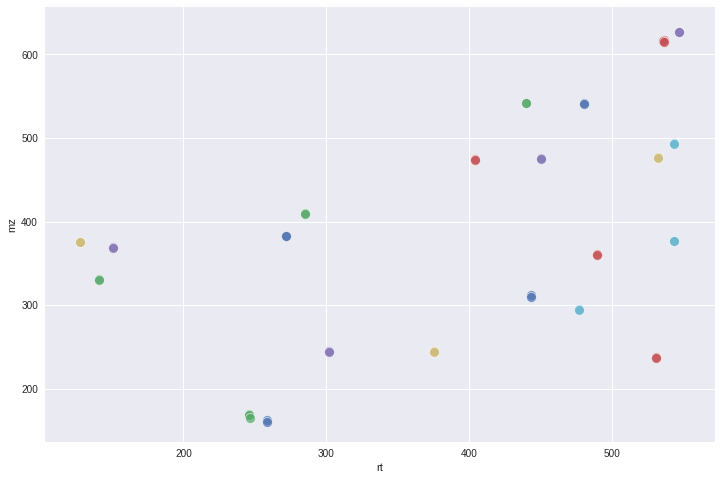

In [42]:
plt.figure(figsize=(12, 8))
for i in iso_res.index:
    if np.random.random() > .65:
        r = info(i, msg=False)
        sns.scatterplot('rt', 'mz', data=r, s=100, alpha=.7)

Index in vica list


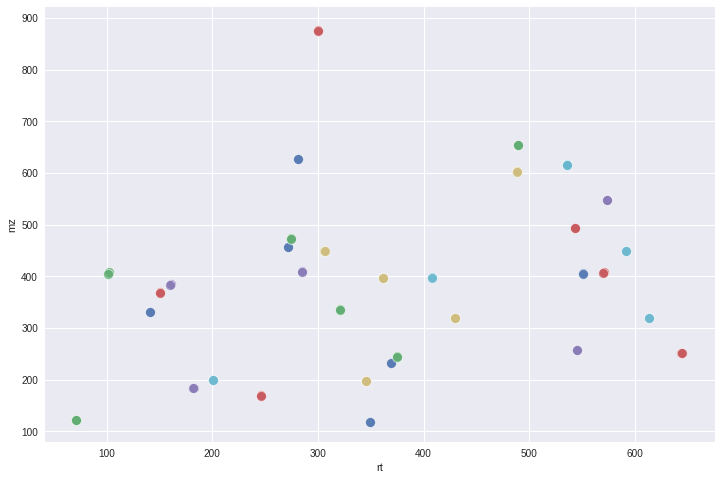

In [169]:
plt.figure(figsize=(12, 8))
for i in iso_res.index:
    if np.random.random() > .65:
        r = info(i, msg=False)
        sns.scatterplot('rt', 'mz', data=r, s=100, alpha=.7)

## Adducts

In [5]:
def deco(fun):
    def wrapper(*args, **kwargs):
        s = time.time()
        results = fun(*args, **kwargs)
        print(time.time()-s)
        return results
    return wrapper

def process(data, fun, axis, **kwargs):
    return data.apply(fun, axis, **kwargs)

def best_number_of_processes(data):
    import multiprocessing as mp
    
    CPUs = mp.cpu_count()
    rows = data.shape[0]
    if rows < 10:
        return 2
    elif rows < 100:
        return 4
    else:
        return CPUs
@deco
def multiprocessing_apply(data, fun, processes=None, axis=1, **kwargs):
    from multiprocessing import Pool
    from functools import partial
    
    if not processes:
        processes = best_number_of_processes(data)
        
    with Pool(processes=processes) as pool:
        if data.isnull().sum().sum():
            print("There are NA")
        
        data = np.array_split(data, processes)
        data = pool.map(partial(process, fun=fun, axis=axis, **kwargs), data)
        
        return pd.concat(data)

In [6]:
adducts = pd.read_html('adducts.html')[0]

adducts = adducts.dropna().drop([0, 3]).drop([3,5,6], axis=1)

pos_adds = adducts.loc[:39]
neg_adds = adducts.loc[40:]

pos_adds.shape, neg_adds.shape

((31, 4), (15, 4))

In [7]:
rts = fd_final['rt'].values

In [8]:
def find_close_rt(x, rt):
    if np.abs(x['rt'] - rt) < .5:
        return x

def partial_find_close_rt(rt):
    return fd_final.apply(find_close_rt, rt=rt, axis=1, result_type='broadcast').dropna()

@deco
def multi_find_close_rt(rts):
    with Pool(processes=12) as pool:
        res = pool.map(partial_find_close_rt, rts)
        res = list(res)
    return res

In [9]:
res_after_find_rt = multi_find_close_rt(rts)

sum([len(r) for r in res_after_find_rt])

15.077536344528198


6613

In [10]:
def parse_mz(formula, mz):
    left, right = formula.split('+')
    if '/' in left:
        left = int(left.split('/')[1])
        
    elif not left.startswith('M'):
        left = 1 / int(left[0])
    else:
        left = 1
    
    right = float(right)
    return (mz-right) * left

def multi_parse_mz(formulas, strucs, mz):
    return {struc: parse_mz(formula, mz) for struc, formula in zip(strucs, formulas)}

In [240]:
def comb(a, length=2):
    N = 2**len(a)
    res = []
    for i in range(N):
        pivot = bin(i)[2:][::-1]
        re = []
        for j in range(len(pivot)):
            if int(pivot[j]):
                re.append(a[j])
        if len(re) == length:
        
            res.append(re)
        
    return res

#@deco
def find_parent_ion_by_adducts(df, ESI_mode='pos'):
    if ESI_mode == 'pos':
        table = pos_adds
    elif ESI_mode == 'neg':
        table = neg_adds
    else:
        print('ESI_mode param can just be either pos or neg!')
        return -1
    
    ms = {}
    if df.shape[0] == 1:
        return None
    
    mzs = df['mz'].values
    indices = df.index
    formulas = table[1]
    strucs = table[0]
    res = pd.DataFrame([multi_parse_mz(formulas, strucs, mz) for mz in mzs]).T
    res = res.rename({i:index for i, index in zip(range(len(indices)), indices)}, axis=1)
    
    c = comb(indices)
    for x1, x2 in c:
        #print(x1, x2)
        m = res[x1].values[:, None] - res[x2].values
        m = pd.DataFrame(m)
        m = m.apply(find_adducts, axis=1).dropna().values
        
        if len(m):
            ms['%s,%s' % (x1, x2)] = m

    if ms:
        return ms, res
    else:
        return None

In [12]:
def find_adducts(x):
    l = len(x)
    res = np.array([-1, -1])
    
    for i, x0 in enumerate(x):
        pivot = np.array([x.name, i])
        if np.abs(x0) < 0.01:
            res = np.vstack([res, pivot])
          
    if res.size > 2:
        return res[1:, :]

In [16]:
@deco
def multi_find_adducts(data):
    with Pool(processes=12) as pool:
        res = pool.map(find_parent_ion_by_adducts, data)
    return res

In [17]:
res_after_find_adducts = multi_find_adducts(res_after_find_rt)

12.889462232589722


In [66]:
from collections import defaultdict

def make_adducts_table(data):
    if data is None:
        return None
    
    dic, table = data
    raw_table = fd_final.loc[table.columns]
    res = defaultdict(list)
    for key, vals in dic.items():
        l, r = [int(i) for i in key.split(',')]
        for val in vals:
            val = np.ravel(val)
            l_strucs = table.index[val[0]]
            r_strucs = table.index[val[1]]
            
            l_mz = table.loc[l_strucs, l]
            r_mz = table.loc[r_strucs, r]
            res['l_index'].append(l)
            res['r_index'].append(r)
            res['l_originM/Z'].append(raw_table.loc[l, 'mz'])
            res['r_originM/Z'].append(raw_table.loc[r, 'mz'])
            res['l_struc'].append(l_strucs)
            res['r_struc'].append(r_strucs)
            res['l_M/Z'].append(l_mz)
            res['r_M/Z'].append(r_mz)
            res['M/Z_differ'].append(np.abs(l_mz-r_mz))
            res['rt_differ'].append(np.abs(raw_table.loc[l, 'rt'] - raw_table.loc[r, 'rt']))
    return pd.DataFrame(res)

@deco
def multi_make_adducts_table(data):
    with Pool(processes=6) as pool:
        res = pool.map(make_adducts_table, data)
        res = pd.concat(list(res))
        res = res.drop_duplicates()
        res.index = np.arange(res.shape[0])
    return res

In [67]:
adducts_table = multi_make_adducts_table(res_after_find_adducts)

0.7128918170928955


In [68]:
adducts_table[['M/Z_differ', 'rt_differ']].corr()

M/Z_differ  rt_differ
M/Z_differ    1.000000   0.069514
rt_differ     0.069514   1.000000

In [24]:
adducts_table.head()

l_index  r_index  l_originM/Z  r_originM/Z      l_struc         r_struc  \
0      602      668   125.096151   129.065877  M+IsoProp+H            2M+H   
1     3586     5978   253.154468   371.273214     M+DMSO+H           2M+Na   
2     7922     7931   541.322921   542.326257     M+2ACN+H  M+IsoProp+Na+H   
3     7922     8066   541.322921   563.305314     2M+ACN+H       2M+ACN+Na   
4     7922     8066   541.322921   563.305314         2M+H           2M+Na   

        l_M/Z       r_M/Z  M/Z_differ  rt_differ  
0   64.030811   64.029301    0.001510   0.152359  
1  174.133248  174.141998    0.008750   0.279999  
2  458.262551  458.271147    0.008596   0.088318  
3  249.644549  249.644775    0.000226   0.014175  
4  270.157822  270.158048    0.000226   0.014175

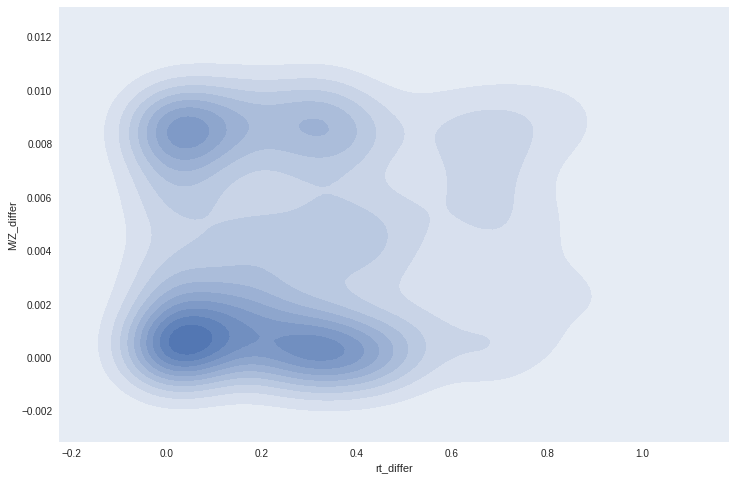

In [476]:
plt.figure(figsize=(12, 8))
sns.kdeplot(adducts_table['rt_differ'], adducts_table['M/Z_differ'], shade=True)

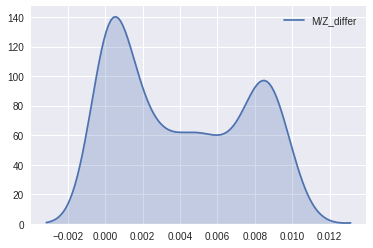

In [36]:
sns.kdeplot(adducts_table['M/Z_differ'], shade=True)

In [41]:
at = adducts_table[adducts_table['M/Z_differ'] < 0.005]

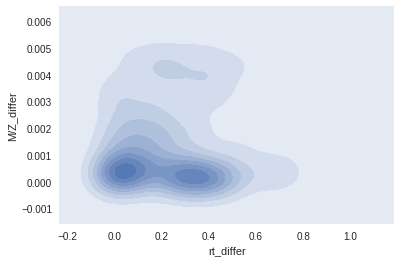

In [44]:
sns.kdeplot(at['rt_differ'], at['M/Z_differ'], shade=True)

总共多少对：

In [52]:
(at['l_index'].astype('str').str[:] + at['r_index'].astype('str').str[:]).unique().size

168

In [53]:
(adducts_table['l_index'].astype('str').str[:] + adducts_table['r_index'].astype('str').str[:]).unique().size

349

In [76]:
adducts_table.shape

(530, 10)

In [79]:
at.to_csv('adducts.csv', index=None)

## Neutral Loss

In [80]:
nloss = \
'''1 hydrogen H2 2.0157
2 water H2O 18.0106
3 methane CH4 16.0313
4 ethene C2H4 28.0313
5 ethine C2H2 26.0157
6 butene C4H8 56.0626
7 pentene C5H8 68.0626
8 benzene C6H6 78.0470
9 formaldehyde CH2O 30.0106
10 carbon monoxide CO 27.9949
11 formic acid CH2O2 46.0055
12 carbon dioxide CO2 43.9898
13 acetic acid C2H4O2 60.0211
14 ketene C2H2O 42.0106
15 propionic acid C3H6O2 74.0368
16 malonic acid C3H4O4 104.0110
17 malonic anhydride C3H2O3 86.0004
18 pentose equivalent C5H8O4 132.0423
19 deoxyhexose equivalent C6H10O4 146.0579
20 hexose equivalent C6H10O5 162.0528
21 hexuronic equivalent acid C6H8O6 176.0321 
22 ammonia NH3 17.0266
23 methylamine CH5N 31.0422
24 methylimine CH3N 29.0266
25 trimethylamine C3H9N 59.0735
26 cyanic acid CHNO 43.0058
27 urea CH4N2O 60.0324
28 phosphonic acid H3PO3 81.9820
29 phosphoric acid H3PO4 97.9769
30 metaphosphoric acid HPO3 79.9663
31 dihydrogen vinyl phosphate C2H5O4P 123.9926
32 hydrogen sulfide H2S 33.9877
33 sulfur S 31.9721
34 sulfur dioxide SO2 63.9619
35 sulfur trioxide SO3 79.9568
36 sulfuric acid H2SO4 97.9674 '''

In [98]:
import re

In [172]:
compound, structure, mass_weight = pd.DataFrame(nloss.split('\n'))[0].str.strip().str.findall('[\d]* (.*) (.*) (.*)').str[0].str
neutral_loss = pd.DataFrame([compound, structure, mass_weight]).T
neutral_loss.columns = ['compound', 'structure', 'mass weight']
neutral_loss['mass weight'] = neutral_loss['mass weight'].astype(float)
neutral_loss.head()

compound structure  mass weight
0  hydrogen        H2       2.0157
1     water       H2O      18.0106
2   methane       CH4      16.0313
3    ethene      C2H4      28.0313
4    ethine      C2H2      26.0157

In [507]:
def find_neutral_loss(s):
    for i, val in s.iteritems():
        val = np.abs(val)
        if val < 0.005:
            return True, i, val
    return None, None, None

In [508]:
def find_parent_ion_by_neutral_loss(data):
    mzs = data['mz'].values
    indices = data.index
    d = {i:mz for i, mz in zip(indices, mzs)}
    res = []
    combs = comb(indices)
    for c in combs:
        # l is always smaller than r
        l, r = c
        temp = d[r] - (d[l] + neutral_loss['mass weight'])
        #return temp
        pivot, struc_i, sub = find_neutral_loss(temp)
        if pivot:
            df = pd.DataFrame([l, r, d[l], d[r], 
                                  neutral_loss['structure'][struc_i], 
                                  neutral_loss['mass weight'][struc_i],
                                  sub, np.abs(data.loc[l, 'rt']- data.loc[r, 'rt'])
                              ]).T
            df.columns = ['l_index', 'r_index', 'l_mz', 'r_mz', 
                          'nl_struc', 'mass weight', 'mz_differ', 'rt_differ']
            res.append(df)
    if res:
        return pd.concat(res)
    else:
        return None

In [509]:
def multi_find_neutral_loss(data):
    with Pool(processes=12) as pool:
        res = pool.map(find_parent_ion_by_neutral_loss, data)
        return pd.concat(res).drop_duplicates()

In [510]:
res_after_find_neutral_loss = multi_find_neutral_loss(res_after_find_rt)

In [511]:
res_after_find_neutral_loss.head()

l_index r_index     l_mz     r_mz nl_struc mass weight    mz_differ  \
0     141     602  97.1014  125.096       CO     27.9949  0.000179175   
0     668    1647  129.066  173.056      CO2     43.9898  3.51393e-05   
0      47     650  86.0606  128.071    C2H2O     42.0106  0.000502497   
0      54     703  88.0398   130.05    C2H2O     42.0106  0.000437197   
0    2118    2792  192.065  220.064       CO     27.9949   0.00343732   

   rt_differ  
0   0.157928  
0  0.0544281  
0   0.360607  
0  0.0276031  
0   0.291748

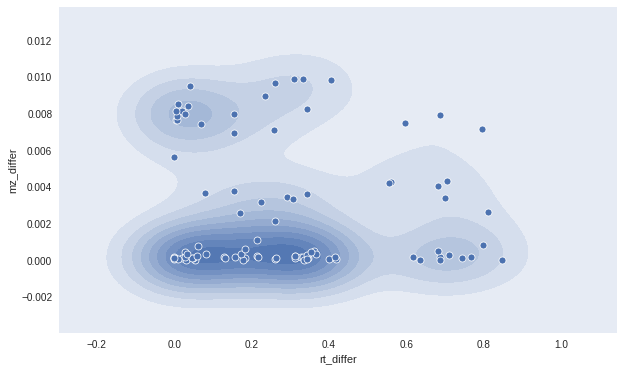

In [506]:
plt.figure(figsize=(10, 6))
sns.kdeplot(res_after_find_neutral_loss['rt_differ'], res_after_find_neutral_loss['mz_differ'], shade=True)
sns.scatterplot('rt_differ', 'mz_differ', data=res_after_find_neutral_loss)

Text(0.6, 0.0012, '←0.5←')

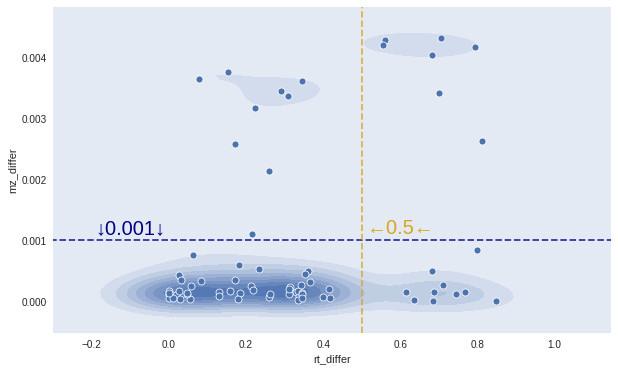

In [557]:
plt.figure(figsize=(10, 6))
sns.kdeplot(res_after_find_neutral_loss['rt_differ'], res_after_find_neutral_loss['mz_differ'], shade=True)
sns.scatterplot('rt_differ', 'mz_differ', data=res_after_find_neutral_loss)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.hlines(0.001, -.5, 1.5, colors='navy', linestyles='dashed', alpha=.8)
plt.vlines(0.5, -1, 1, colors='goldenrod', linestyles='dashed', alpha=.8)
plt.xlim(xlim)
plt.ylim(ylim)
plt.text(-.1, 0.0012, '↓0.001↓', ha='center', va='center', size=20, color='navy')
plt.text(.6, 0.0012, '←0.5←', ha='center', va='center', size=20, color='goldenrod')

In [565]:
nl = res_after_find_neutral_loss[(res_after_find_neutral_loss['mz_differ'] < 0.001) & (res_after_find_neutral_loss['rt_differ'] < .5)]

In [568]:
nl['nl_struc'].value_counts()

H2O       13
CO         8
NH3        8
C2H2O      4
CH2O2      3
CO2        2
C6H8O6     1
H2SO4      1
C2H4O2     1
C2H4       1
CH4        1
C5H8       1
C6H6       1
C2H2       1
Name: nl_struc, dtype: int64

In [574]:
nl.to_csv('neutral_loss.csv', index=None)

## Aggregation

In [569]:
res_after_find_neutral_loss['nl_struc'].value_counts()

H2O        19
CO         10
NH3        10
CH2O2       5
C2H2O       4
C2H4O2      4
CH4N2O      2
CO2         2
CH4         2
C2H4        2
C3H6O2      2
C6H8O6      2
C6H10O4     1
H3PO3       1
HPO3        1
H2SO4       1
C6H6        1
C5H8        1
CH5N        1
C2H2        1
Name: nl_struc, dtype: int64

In [33]:
adducts_table['l_struc'].value_counts()[:5]

M+2ACN+H    87
M+H         45
2M+H        41
M+NH4       37
M+Na        33
Name: l_struc, dtype: int64

In [32]:
adducts_table['r_struc'].value_counts()[:5]

M+IsoProp+Na+H    87
2M+ACN+Na         44
2M+Na             40
2M+ACN+H          37
M+ACN+Na          29
Name: r_struc, dtype: int64

In [31]:
at['l_struc'].value_counts()[:5]

M+H      37
2M+H     27
M+NH4    24
M+Na     23
M+2H     19
Name: l_struc, dtype: int64

In [30]:
at['r_struc'].value_counts()[:5]

2M+Na        29
2M+ACN+Na    26
M+ACN+Na     25
M+Na         24
M+2Na-H      21
Name: r_struc, dtype: int64

In [29]:
at['r_struc'].value_counts()[:5]

2M+Na        29
2M+ACN+Na    26
M+ACN+Na     25
M+Na         24
M+2Na-H      21
Name: r_struc, dtype: int64

In [21]:
a = dict(at['l_struc'].value_counts())
b = dict(at['r_struc'].value_counts())

In [25]:
for c in list(b):
    if c in a:
        a[c] += b[c]
    else:
        a[c] = b[c]

In [27]:
pd.Series(a)

M+H               41
2M+H              41
M+NH4             37
M+Na              47
M+2H              22
M+3H              16
2M+NH4            32
M+K               24
M+ACN+H           28
2M+ACN+H          31
M+IsoProp+H       18
M+2ACN+H          16
M+CH3OH+H         12
M+H+NH4            8
M+H+Na            10
M+ACN+Na          32
M+2Na             19
M+2ACN+2H         11
2M+Na             35
M+DMSO+H          15
M+ACN+2H           7
M+3ACN+2H          8
M+IsoProp+Na+H    15
M+2Na-H           25
M+H+K             10
2M+K              20
M+3Na             16
M+2H+Na            2
2M+ACN+Na         26
M+2K-H             6
dtype: int64

In [40]:
a = adducts_table[(adducts_table['l_struc'].str.contains('ACN')) | (adducts_table['r_struc'].str.contains('ACN'))]

In [55]:
np.intersect1d((a['l_index'].values),(a['r_index'].values))

array([ 706,  872, 1018, 1379, 2695, 3131, 3264, 3485, 3508, 3561, 3574,
       4212, 4313, 4516, 5406, 5796, 6550, 7460, 7548, 7931, 8066, 8319,
       8450])

In [59]:
adducts_table[adducts_table['l_index'] == 872]

l_index  r_index  l_originM/Z  r_originM/Z   l_struc    r_struc  \
79      872     1379   139.549149   163.096354  M+DMSO+H   2M+ACN+H   
81      872     1959   139.549149   185.078322  M+DMSO+H  2M+ACN+Na   

        l_M/Z      r_M/Z  M/Z_differ  rt_differ  
79  60.527929  60.531266    0.003337   0.415977  
81  60.527929  60.531278    0.003350   0.001536

## all indices that involved in iso, adducts or neutral loss

In [237]:
iso_is = set(iso_table['fd_index'])
len(iso_is)

176

In [238]:
adducts_is = set(adducts_table['l_index'].values)
adducts_is.update(adducts_table['r_index'].values)
len(adducts_is)

505

In [239]:
nl_is = set(res_after_find_neutral_loss['l_index'].values)
nl_is.update(res_after_find_neutral_loss['r_index'])
len(nl_is)

130

In [240]:
from matplotlib_venn import venn3

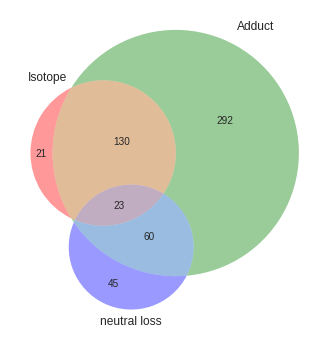

In [241]:
plt.figure(figsize=(10, 6))
venn3([iso_is, adducts_is, nl_is], ('Isotope', 'Adduct', 'neutral loss'))

In [204]:
all_is = set.union(iso_is, adducts_is, nl_is)
single_fd = fd_final.copy().loc[(fd_final.index ^ pd.Index(all_is))]
into_agg = into.copy().loc[fd_final.index]
fd_need_agg = fd_final.copy().loc[pd.Index(all_is)]
fd_need_agg['isoadnl'] = 0
fd_need_agg['drop'] = 1
into_agg.shape, fd_need_agg.shape

((1361, 37), (573, 15))

In [170]:
def agg_iso(iso_table, fd_table, into_table, how='sum'):
    fd_need_agg = fd_table.copy()
    into_agg = into_table.copy()
    cols = into_agg.columns
    if not (how == 'sum' or how == 'drop'):
        raise TypeError('agg_iso() got an unexpected keyword argument "how" > ("sum" or "drop")')
    prime_list = []
    for group in iso_table['group'].unique():
        temp = iso_table[iso_table['group']==group].copy()
        prime_list.append(temp.iloc[-1, 4])
    
    for group in iso_table['group'].unique():
        temp = iso_table[iso_table['group']==group].copy()
        if temp.iloc[0, 0] < temp.iloc[-1,0]:
            raise IndexError('invalid order in group:%s' % group)
        prime = temp.index[-1]
        free = temp.index[:-1]
        
        total = temp.index
        
        pivot = False
        for f in free:
            if not f in prime_list:
                fd_need_agg.loc[f, 'drop'] = np.nan
                pivot = True
        if pivot:
            fd_need_agg.loc[prime, 'isoadnl'] = 1
        
        if how=='sum':
            for f in free:
                if not f in prime_list:
                    into_agg.loc[prime, cols[1:]] = into_agg.loc[prime, cols[1:]] + into_agg.loc[f, cols[1:]]
    fd_need_agg = fd_need_agg.dropna()
    into_agg = into_agg.loc[fd_need_agg.index]
    return fd_need_agg, into_agg

In [205]:
def agg_iso(iso_table, fd_table, into_table, how='sum', conservative=True):
    fd_need_agg = fd_table.copy()
    into_agg = into_table.copy()
    cols = into_agg.columns
    if not (how == 'sum' or how == 'drop'):
        raise TypeError('agg_iso() got an unexpected keyword argument "how" > ("sum" or "drop")')
    prime_list = []
    for group in iso_table['group'].unique():
        temp = iso_table[iso_table['group']==group].copy()
        prime_list.append(temp.iloc[-1, 4])
    
    for group in iso_table['group'].unique():
        temp = iso_table[iso_table['group']==group].copy()
        if temp.iloc[0, 0] < temp.iloc[-1,0]:
            raise IndexError('invalid order in group:%s' % group)
        prime = temp.index[-1]
        free = temp.index[:-1]
        
        total = temp.index
        
        pivot = False
        
        val = fd_need_agg.loc[prime, 'var']
        for f in free:
            if conservative and fd_need_agg.loc[f, 'var'] > val:
                break
            if not f in prime_list:
                fd_need_agg.loc[f, 'drop'] = np.nan
                pivot = True
            if how=='sum':
                if not f in prime_list:
                    into_agg.loc[prime, cols[1:]] = into_agg.loc[prime, cols[1:]] + into_agg.loc[f, cols[1:]]
        if pivot:
            fd_need_agg.loc[prime, 'isoadnl'] = 1
        
    fd_need_agg = fd_need_agg.dropna()
    into_agg = into_agg.loc[fd_need_agg.index]
    return fd_need_agg, into_agg

In [206]:
fd_iso, into_iso = agg_iso(iso_table, fd_need_agg, into_agg, conservative=True)

In [212]:
fd_iso['isoadnl'].value_counts()

0    466
1     53
Name: isoadnl, dtype: int64

In [248]:
fd_iso.shape

(519, 15)

In [227]:
def agg_ad(fd_iso, into_iso, adducts_table):
    fd_ad = fd_iso.copy()
    into_ad = into_iso.copy()
    cols = into_ad.columns
    indices = fd_ad.index
    pairs = at[['l_index', 'r_index']].drop_duplicates().values
    fd_ad['pivot'] = 0
    for pair in pairs:
        if pair[0] in indices and pair[1] in indices:
            temp = fd_ad.loc[pair]
            fd_ad.loc[temp.index[-1], 'drop'] = np.nan
            into_ad.loc[temp.index[0], cols[1:]] += into_ad.loc[temp.index[-1], cols[1:]]
            fd_ad.loc[temp.index[0], 'pivot'] = 2
            
    fd_ad['isoadnl'] = fd_ad['isoadnl'] + fd_ad['pivot']
    fd_ad = fd_ad.drop('pivot', axis=1)
    fd_ad = fd_ad.dropna()
    into_ad = into_ad.loc[fd_ad.index]

    return fd_ad, into_ad

In [228]:
fd_ad, into_ad = agg_ad(fd_iso, into_iso, adducts_table)

In [229]:
fd_ad.shape, into_ad.shape

((380, 15), (380, 37))

In [235]:
fd_ad['isoadnl'].value_counts()

0    221
2    114
1     37
3      8
Name: isoadnl, dtype: int64

In [231]:
def agg_nl(fd_ad, into_ad, res_after_find_neutral_loss):
    fd_nl = fd_ad.copy()
    into_nl = into_ad.copy()
    cols = into_nl.columns
    indices = fd_nl.index
    fd_nl['pivot'] = 0
    pairs = res_after_find_neutral_loss[['l_index', 'r_index']].values
    for pair in pairs:
        if pair[0] in fd_nl.index and pair[1] in indices:
            temp = fd_nl.loc[pair]
            fd_nl.loc[temp.index[-1], 'drop'] = np.nan
            into_nl.loc[temp.index[0], cols[1:]] += into_nl.loc[temp.index[-1], cols[1:]]
            fd_nl.loc[temp.index[0], 'pivot'] = 4
    fd_nl['isoadnl'] = fd_nl['isoadnl'] + fd_nl['pivot']
    fd_nl = fd_nl.drop('pivot', axis=1)
    fd_nl = fd_nl.dropna()
    into_nl = into_nl.loc[fd_nl.index]
    return fd_nl, into_nl

In [232]:
fd_nl, into_nl = agg_nl(fd_ad, into_ad, res_after_find_neutral_loss)

In [233]:
fd_nl.shape, into_nl.shape

((340, 15), (340, 37))

In [234]:
fd_nl['isoadnl'].value_counts()

0    168
2     96
1     33
4     24
6     10
3      8
5      1
Name: isoadnl, dtype: int64

In [256]:
fd_nl = fd_nl.drop('drop', axis=1)

In [258]:
single_fd['isoadnl'] = 0

In [263]:
fd_after_agg = pd.concat([single_fd, fd_nl])

In [281]:
as_after_agg = allsamples.loc[fd_after_agg.index]

In [288]:
fagg = as_after_agg.T.values

fagg = fagg / (fagg.sum(1) / fagg.sum(1).max())[:, np.newaxis]
fagg = StandardScaler().fit_transform(fagg)

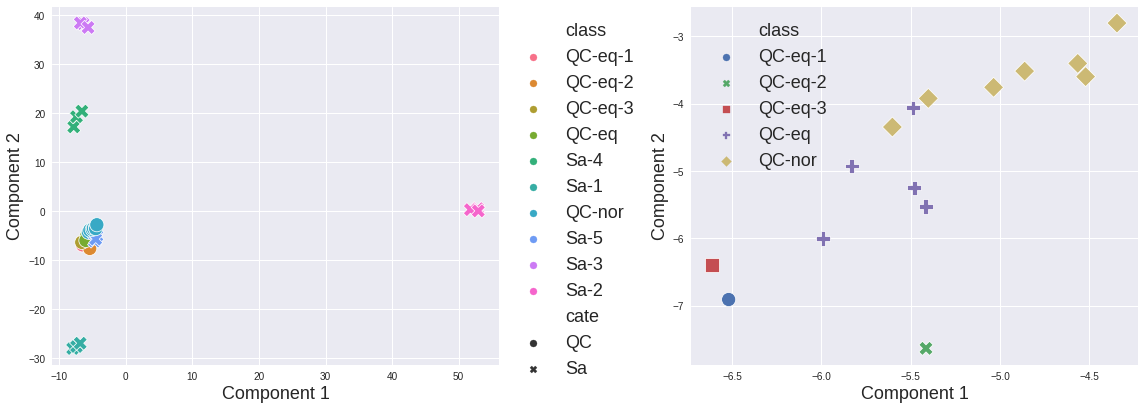

In [289]:
pca_mat = draw_pca(fagg)

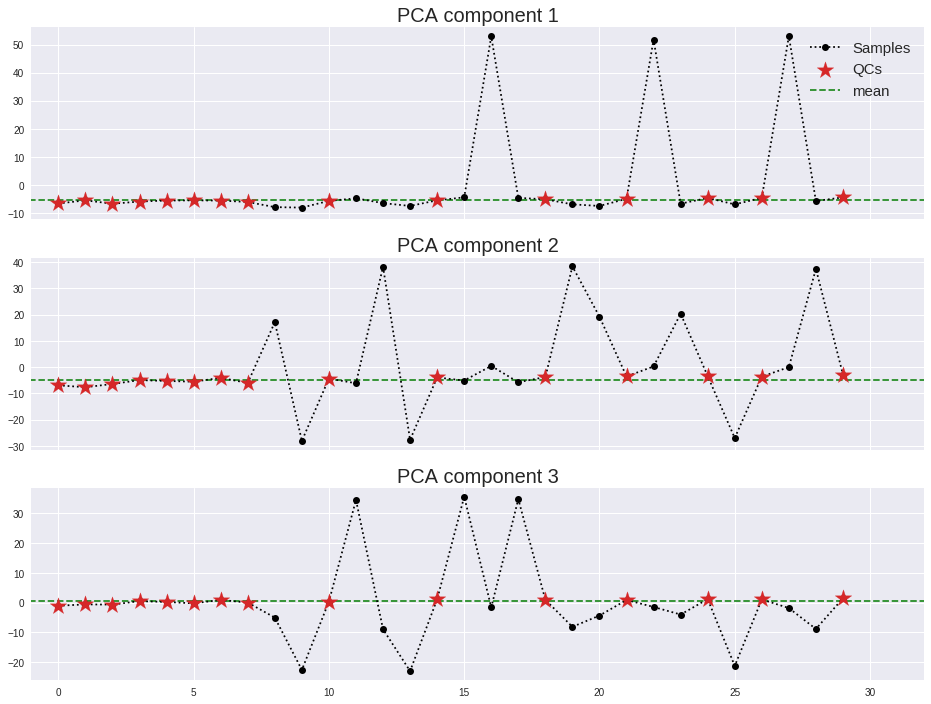

In [290]:
draw_trend(pca_mat)